# 

# Python Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Milestone 1: Data Collection, Exploration, and Preprocessing

### 1. Data Collection:
##### Acquire a dataset containing historical sales data (e.g., daily or weekly sales data from retail 
##### or e-commerce platforms).
##### Ensure that the dataset includes relevant features like sales amount, date, promotions, 
##### holidays, weather, etc.

In [2]:
df=pd.read_csv(r"final_data.csv")

In [3]:
df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1,credit_card,2,...,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1,credit_card,3,...,239.0,2.0,30000.0,50.0,30.0,40.0,3471,sao paulo,SP,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1,credit_card,5,...,695.0,2.0,3050.0,33.0,13.0,33.0,37564,borda da mata,MG,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1,credit_card,2,...,480.0,1.0,200.0,16.0,10.0,15.0,14403,franca,SP,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1,credit_card,3,...,409.0,1.0,3750.0,35.0,40.0,30.0,87900,loanda,PR,garden_tools


In [4]:
pd.set_option("display.max_columns",None)

In [5]:
df.shape
# know number of columns and rows

(116581, 40)

### 2. Data Exploration:

##### Perform exploratory data analysis (EDA) to understand trends, seasonality, and missing 
##### values in the dataset.
##### Generate summary statistics, check for outliers, and identify key patterns and correlations 
##### (e.g., sales with promotions, holidays).

#### Detect the data type

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116581 entries, 0 to 116580
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       116581 non-null  object 
 1   order_item_id                  116581 non-null  int64  
 2   product_id                     116581 non-null  object 
 3   seller_id                      116581 non-null  object 
 4   shipping_limit_date            116581 non-null  object 
 5   price                          116581 non-null  float64
 6   freight_value                  116581 non-null  float64
 7   payment_sequential             116581 non-null  int64  
 8   payment_type                   116581 non-null  object 
 9   payment_installments           116581 non-null  int64  
 10  payment_value                  116581 non-null  float64
 11  review_id                      116581 non-null  object 
 12  review_score                  

#### Detect the Null values

In [7]:
df.isnull().sum()

order_id                              0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
review_id                             0
review_score                          0
review_comment_title             102585
review_comment_message            66703
review_creation_date                  0
review_answer_timestamp               0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    14
order_delivered_carrier_date       1213
order_delivered_customer_date      2515
order_estimated_delivery_date         0
customer_unique_id                    0


#### Detect the statistical analysis

In [8]:
df.describe()

,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,customer_zip_code_prefix,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix
count,116581.000000,116581.000000,116581.000000,116581.000000,116581.000000,116581.000000,116581.000000,116581.000000,116581.000000,116581.000000,116581.000000,116580.000000,116580.00000,116580.000000,116580.000000,116581.000000
mean,1.196953,120.751369,20.062550,1.093369,2.949614,172.910258,4.017507,35053.391556,48.766317,785.949331,2.204991,2115.560422,30.31858,16.645891,23.116898,24504.889030
std,0.701350,183.848421,15.845515,0.727240,2.783798,267.622516,1.397886,29817.864821,10.033728,652.614023,1.717417,3783.587898,16.22276,13.474741,11.758687,27625.157426
min,1.000000,0.850000,0.000000,1.000000,0.000000,0.000000,1.000000,1003.000000,5.000000,4.000000,1.000000,0.000000,7.00000,2.000000,6.000000,1001.000000
25%,1.000000,39.900000,13.080000,1.000000,1.000000,61.000000,4.000000,11310.000000,42.000000,346.000000,1.000000,300.000000,18.00000,8.000000,15.000000,6429.000000
50%,1.000000,74.900000,16.320000,1.000000,2.000000,108.190000,5.000000,24315.000000,52.000000,600.000000,1.000000,700.000000,25.00000,13.000000,20.000000,13690.000000
75%,1.000000,134.900000,21.220000,1.000000,4.000000,189.720000,5.000000,58600.000000,57.000000,983.000000,3.000000,1800.000000,38.00000,20.000000,30.000000,28495.000000
max,21.000000,6735.000000,409.680000,29.000000,24.000000,13664.080000,5.000000,99980.000000,76.000000,3992.000000,20.000000,40425.000000,105.00000,105.000000,118.000000,99730.000000


#### Detect the duplication

In [9]:
df[df.duplicated()]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english


#### Detect the Correlation

In [10]:
df.select_dtypes(include=['int','float']).corr()

,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,customer_zip_code_prefix,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix
order_item_id,1.000000,-0.060409,-0.030928,-0.002537,0.074354,0.266085,-0.131308,-0.000272,-0.024101,-0.015068,-0.054420,-0.004214,0.005323,0.029902,-0.009416,-0.019146
price,-0.060409,1.000000,0.416591,0.006864,0.278526,0.738048,-0.006065,0.042941,0.017963,0.201692,0.052601,0.340713,0.145724,0.224439,0.172384,0.088985
freight_value,-0.030928,0.416591,1.000000,0.020071,0.186011,0.373490,-0.038556,0.225468,0.022629,0.096484,0.022269,0.612938,0.308374,0.394075,0.324112,0.151844
payment_sequential,-0.002537,0.006864,0.020071,1.000000,-0.085688,-0.063841,-0.003591,-0.020990,-0.005574,0.009943,-0.010826,0.040738,0.047988,0.023177,0.029604,0.014915
payment_installments,0.074354,0.278526,0.186011,-0.085688,1.000000,0.274031,-0.043788,0.057315,0.020909,0.035968,0.000041,0.178010,0.116886,0.121719,0.137259,0.038099
payment_value,0.266085,0.738048,0.373490,-0.063841,0.274031,1.000000,-0.084941,0.054158,0.002341,0.156024,0.009927,0.304916,0.138798,0.217745,0.148458,0.069829
review_score,-0.131308,-0.006065,-0.038556,-0.003591,-0.043788,-0.084941,1.000000,-0.023482,-0.005773,0.009705,0.022351,-0.030410,-0.022948,-0.028161,-0.012784,0.025360
customer_zip_code_prefix,-0.000272,0.042941,0.225468,-0.020990,0.057315,0.054158,-0.023482,1.000000,0.015831,0.025364,0.020470,0.002736,0.005168,0.012015,-0.010363,0.076241
product_name_lenght,-0.024101,0.017963,0.022629,-0.005574,0.020909,0.002341,-0.005773,0.015831,1.000000,0.090245,0.145351,0.020722,0.058690,-0.030912,0.062138,-0.032565
product_description_lenght,-0.015068,0.201692,0.096484,0.009943,0.035968,0.156024,0.009705,0.025364,0.090245,1.000000,0.117852,0.063554,0.007472,0.074158,-0.068264,0.062242


### Data Preprocessing:  
#### 1-Handle missing values, remove duplicates, and address any data inconsistencies. 
#### 2-Engineer time-based features (e.g., day of the week, month, seasonality, promotional 
#### periods). 

#### 1-Handle missing values, remove duplicates, and address any data inconsistencies

#### Handle missing values

In [11]:
df.drop(columns=['review_comment_title','review_comment_message'],inplace=True)
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'], errors='coerce')
df['order_delivered_carrier_date'] = pd.to_datetime(df['order_delivered_carrier_date'], errors='coerce')
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'], errors='coerce')
df['order_approved_at'].fillna(df['order_approved_at'].median(), inplace=True)
df['order_delivered_carrier_date'].fillna(df['order_delivered_carrier_date'].mode()[0], inplace=True)
df['order_delivered_customer_date'].fillna(df['order_delivered_customer_date'].mode()[0], inplace=True)
df.dropna(subset=['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'], inplace=True)

C:\Users\test\AppData\Local\Temp\ipykernel_14380\1245689146.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['order_approved_at'].fillna(df['order_approved_at'].median(), inplace=True)
C:\Users\test\AppData\Local\Temp\ipykernel_14380\1245689146.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

In [12]:
df.isnull().sum()

order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
review_id                        0
review_score                     0
review_creation_date             0
review_answer_timestamp          0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
product_category_name            0
product_name_lenght              0
product_description_

In [13]:
# No duplication to handle it

#### Address any data inconsistencies

In [14]:
df[df['order_delivered_customer_date'] < df['order_purchase_timestamp']]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
80,002f19a65a2ddd70a090297872e6d64e,1,9eae06d51aaa383b2bed5547a19d581c,1835b56ce799e6a4dc4eddc053f04066,2018-03-27 13:15:27,53.98,23.31,1,voucher,1,44.11,396eacbff771557619771e8d4b58ee77,3,2018-04-18 00:00:00,2018-04-20 05:01:01,7fa80efb1ef15ca4104627910c29791c,shipped,2018-03-21 13:05:30,2018-03-21 13:15:27,2018-03-22 00:13:35,2017-08-14 12:46:18,2018-04-16 00:00:00,205d5aa158338f2b733a07326aae8c87,42804,camacari,BA,cama_mesa_banho,52.0,337.0,1.0,800.0,16.0,10.0,16.0,14940,ibitinga,SP,bed_bath_table
81,002f19a65a2ddd70a090297872e6d64e,1,9eae06d51aaa383b2bed5547a19d581c,1835b56ce799e6a4dc4eddc053f04066,2018-03-27 13:15:27,53.98,23.31,2,voucher,1,33.18,396eacbff771557619771e8d4b58ee77,3,2018-04-18 00:00:00,2018-04-20 05:01:01,7fa80efb1ef15ca4104627910c29791c,shipped,2018-03-21 13:05:30,2018-03-21 13:15:27,2018-03-22 00:13:35,2017-08-14 12:46:18,2018-04-16 00:00:00,205d5aa158338f2b733a07326aae8c87,42804,camacari,BA,cama_mesa_banho,52.0,337.0,1.0,800.0,16.0,10.0,16.0,14940,ibitinga,SP,bed_bath_table
86,00310b0c75bb13015ec4d82d341865a4,1,c8e7c2ef329fcda4a233e7e2f8bb8b7d,a2deecd5398f5df4987110c80a1972a3,2018-08-17 15:04:25,39.90,15.38,1,credit_card,2,55.28,8f28fc7d29a09403973697645d73b72a,1,2018-08-31 00:00:00,2018-08-31 22:49:14,0dad07848c618cc5a4679a1bfe1db8d2,canceled,2018-08-15 14:29:08,2018-08-15 15:04:25,2017-08-10 11:58:14,2017-08-14 12:46:18,2018-08-29 00:00:00,ec979208947bbba310f2ad8e50963725,31160,belo horizonte,MG,utilidades_domesticas,58.0,1245.0,1.0,200.0,16.0,12.0,11.0,5043,sao paulo,SP,housewares
264,00a99c50fdff7e36262caba33821875a,1,76d75f398634bf194ba99d7297e7d1fa,974cf2cb8f4b7add98709c30df02fe10,2018-08-21 16:35:18,52.99,22.30,1,credit_card,4,75.29,e92a1612d8dcd014217178bd28cc54b2,5,2018-08-25 00:00:00,2018-08-25 23:44:42,7a399396442d5601cbedfbd0a3cf1da4,shipped,2018-08-17 16:25:04,2018-08-17 16:35:18,2018-08-18 09:07:00,2017-08-14 12:46:18,2018-09-18 00:00:00,60ec651482858c327c177cf9360cc0a2,45990,teixeira de freitas,BA,informatica_acessorios,59.0,1775.0,4.0,350.0,25.0,11.0,15.0,14802,araraquara,SP,computers_accessories
274,00ae7a8b4936674ebb701d4a23719a79,1,66f09a6de4f2ef63aaf5349b60a0e0c0,bf0d50a6410d487dc97d2baac0a8c0be,2018-05-15 15:51:32,27.90,9.26,1,credit_card,1,37.16,f9c1a71690bf7288861804ece5383ea1,2,2018-05-19 00:00:00,2018-05-20 18:56:33,a7e8a3cb55d9c9a536992c6465a46a3f,canceled,2018-05-09 14:14:06,2018-05-09 15:51:32,2017-08-10 11:58:14,2017-08-14 12:46:18,2018-05-17 00:00:00,f0b9f688a3b9151bc6b38f4b5b36ea44,6539,santana de parnaiba,SP,automotivo,52.0,1139.0,1.0,600.0,16.0,11.0,11.0,13408,piracicaba,SP,auto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116020,fecc4ea5a3e06ce3192ae2f05b7a8439,4,70adb75b3b2e86cffbb697c90867c3f3,4e2627090e6e5b9fabba883a37897683,2018-01-21 22:09:08,39.90,14.10,1,credit_card,1,216.00,ad39f464785acf795ee836cb3472756e,1,2018-02-08 00:00:00,2018-02-08 10:29:25,ec43686dd7b2f48ea65475606fdfc85d,processing,2018-01-14 21:52:31,2018-01-14 22:09:08,2017-08-10 11:58:14,2017-08-14 12:46:18,2018-02-06 00:00:00,12bf6178776d90da204cdf1b37d23906,13214,jundiai,SP,moveis_decoracao,31.0,437.0,2.0,100.0,65.0,11.0,11.0,31565,belo horizonte,MG,furniture_decor
116121,feebdfdb4759bd4600d52547c81b4fa8,1,0c7536abc1a

#### Handle the data inconsistencies 

In [15]:
df.loc[
    df['order_delivered_customer_date'] < df['order_purchase_timestamp'],
    'order_delivered_customer_date'
] = pd.NaT

In [16]:
df[df['order_delivered_customer_date'] < df['order_purchase_timestamp']]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english


In [17]:
columns_to_lower = ['product_category_name', 'payment_type', 'customer_city', 
                    'customer_state', 'seller_city', 'seller_state', 'product_category_name_english']

df[columns_to_lower] = df[columns_to_lower].apply(lambda x: x.str.lower())

In [18]:
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

#### 2-Engineer time-based features (e.g., day of the week, month, seasonality, promotional periods). 

In [19]:
df['date of shipping_limit'] = pd.to_datetime(df['shipping_limit_date']).dt.date 
df['day shipping_limit']=pd.to_datetime(df['date of shipping_limit']).dt.day
df['month shipping_limit']=pd.to_datetime(df['date of shipping_limit']).dt.month
df['year shipping_limit']=pd.to_datetime(df['date of shipping_limit']).dt.year
df['day of review creation']=pd.to_datetime(df['review_creation_date']).dt.day
df['month of review creation']=pd.to_datetime(df['review_creation_date']).dt.month
df['year of review creation']=pd.to_datetime(df['review_creation_date']).dt.year
df['date of review creation']=pd.to_datetime(df['review_creation_date']).dt.date


df['day of answer for the review creation']=pd.to_datetime(df['review_answer_timestamp']).dt.day
df['month of answer for the review creation']=pd.to_datetime(df['review_answer_timestamp']).dt.month
df['year of answer for the review creation']=pd.to_datetime(df['review_answer_timestamp']).dt.year
df['date of answer for the review creation']=pd.to_datetime(df['review_answer_timestamp']).dt.date



df['day of order buy']=pd.to_datetime(df['order_purchase_timestamp']).dt.day
df['month of order buy']=pd.to_datetime(df['order_purchase_timestamp']).dt.month
df['year of order buy']=pd.to_datetime(df['order_purchase_timestamp']).dt.year
df['date of order buy']=pd.to_datetime(df['order_purchase_timestamp']).dt.date


df['day of approve for the order']=pd.to_datetime(df['order_approved_at']).dt.day
df['month of approve for the order']=pd.to_datetime(df['order_approved_at']).dt.month
df['year of approve for the order']=pd.to_datetime(df['order_approved_at']).dt.year
df['date of approve for the order']=pd.to_datetime(df['order_approved_at']).dt.date


df['day of deliver for the Shipping company']=pd.to_datetime(df['order_delivered_carrier_date']).dt.day
df['month of deliver for the Shipping company']=pd.to_datetime(df['order_delivered_carrier_date']).dt.month
df['year of deliver for the Shipping company']=pd.to_datetime(df['order_delivered_carrier_date']).dt.year
df['date of deliver for the Shipping company']=pd.to_datetime(df['order_delivered_carrier_date']).dt.date


df['day of deliver for customer']=pd.to_datetime(df['order_delivered_customer_date']).dt.day
df['month of deliver for customer']=pd.to_datetime(df['order_delivered_customer_date']).dt.month
df['year of deliver for customer']=pd.to_datetime(df['order_delivered_customer_date']).dt.year
df['date of deliver for customer']=pd.to_datetime(df['order_delivered_customer_date']).dt.date


df['day of expected to deliver for the customer']=pd.to_datetime(df['order_estimated_delivery_date']).dt.day
df['month of expected to deliver for the customer']=pd.to_datetime(df['order_estimated_delivery_date']).dt.month
df['year of expected to deliver for the customer']=pd.to_datetime(df['order_estimated_delivery_date']).dt.year
df['date of expected to deliver for the customer']=pd.to_datetime(df['order_estimated_delivery_date']).dt.date

In [20]:
df.isnull().sum()

order_id                                            0
order_item_id                                       0
product_id                                          0
seller_id                                           0
shipping_limit_date                                 0
                                                 ... 
date of deliver for customer                     1703
day of expected to deliver for the customer         0
month of expected to deliver for the customer       0
year of expected to deliver for the customer        0
date of expected to deliver for the customer        0
Length: 70, dtype: int64

In [21]:
df.dropna(axis=0,inplace=True)

In [22]:
df.shape

(114877, 70)

In [23]:
df.isnull().sum()

order_id                                         0
order_item_id                                    0
product_id                                       0
seller_id                                        0
shipping_limit_date                              0
                                                ..
date of deliver for customer                     0
day of expected to deliver for the customer      0
month of expected to deliver for the customer    0
year of expected to deliver for the customer     0
date of expected to deliver for the customer     0
Length: 70, dtype: int64

# Deliverables: 
##### Data Exploration Report: A summary of findings from data exploration, including trends, seasonality, 
##### and any data quality issues. 
##### Exploratory Data Analysis (EDA) Notebook: A Jupyter notebook with visualizations such as line 
##### plots, histograms, and correlation heatmaps to reveal key insights. 
##### Cleaned Dataset: A well-processed dataset that is ready for analysis and modeling.

# Milestone 2: Data Analysis and Visualization

## Data Analysis & Data Visualization

### Number of Orders per Day

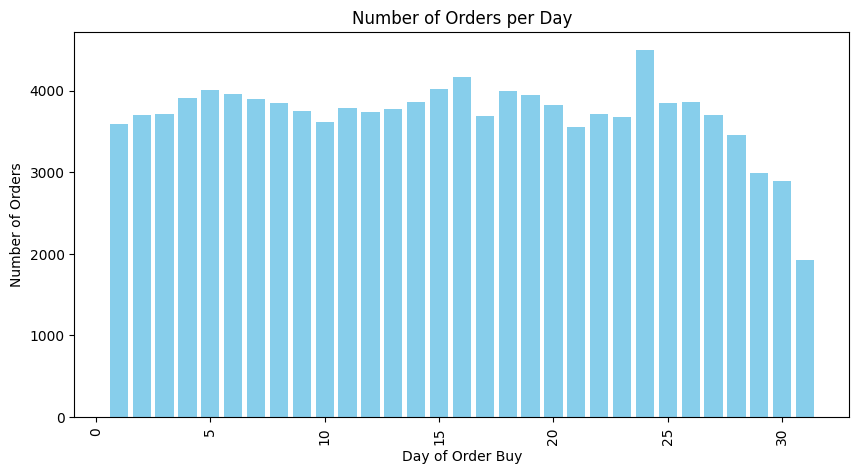

In [24]:
x = df['day of order buy'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
plt.bar(x.index, x.values, color='skyblue')
plt.xlabel("Day of Order Buy")
plt.ylabel("Number of Orders")
plt.title("Number of Orders per Day")
plt.xticks(rotation=90)
plt.show()

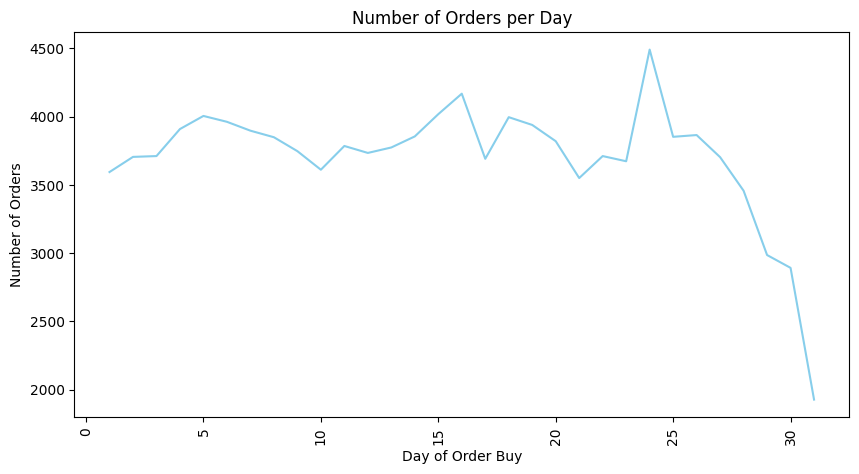

In [25]:
x = df['day of order buy'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
plt.plot(x.index, x.values, color='skyblue')
plt.xlabel("Day of Order Buy")
plt.ylabel("Number of Orders")
plt.title("Number of Orders per Day")
plt.xticks(rotation=90)
plt.show()

### Number Of Orders per month

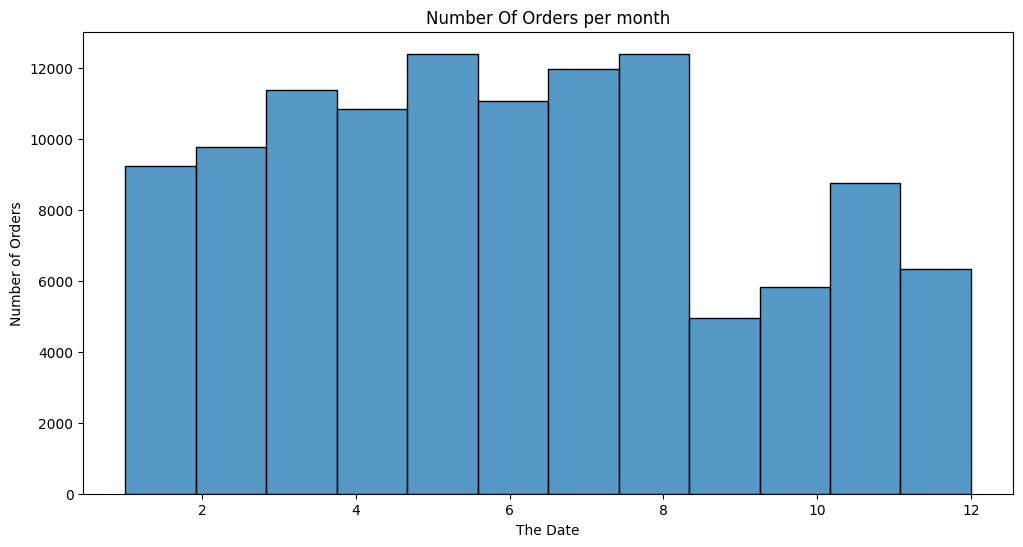

In [26]:
plt.figure(figsize=(12, 6))
sns.histplot(df['month of order buy'], bins=12)  
plt.xticks(rotation=0) 
plt.title("Number Of Orders per month")
plt.xlabel("The Date")
plt.ylabel("Number of Orders")
plt.show()

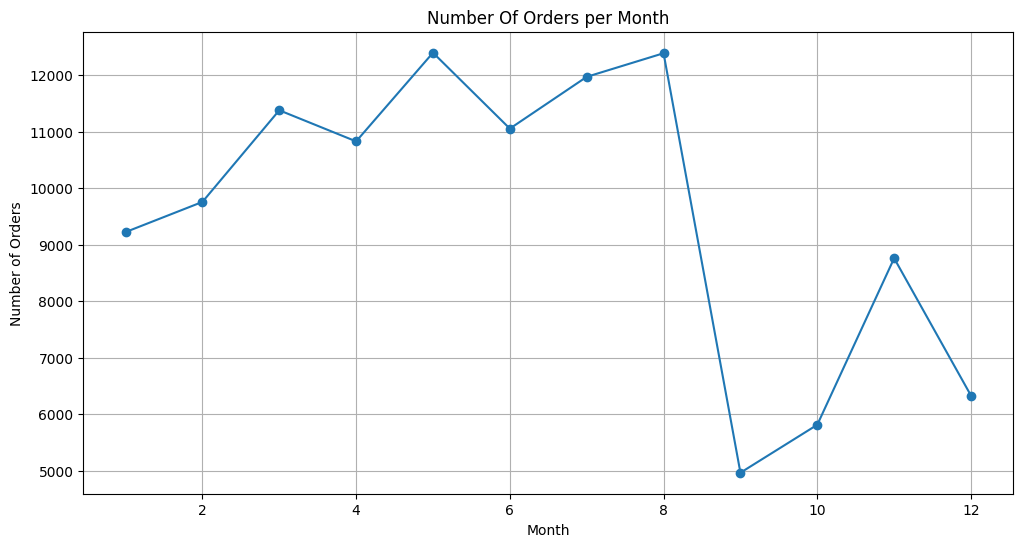

In [27]:
monthly_orders = df['month of order buy'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.plot(monthly_orders.index, monthly_orders.values, marker='o')  
plt.xticks(rotation=0)
plt.title("Number Of Orders per Month")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.grid(True)
plt.show()


### Detect The Number of orders per Months Using Value Counts

In [28]:
df['month of order buy'].value_counts()

month of order buy
5     12400
8     12391
7     11973
3     11381
6     11056
4     10830
2      9758
1      9224
11     8761
12     6328
10     5812
9      4963
Name: count, dtype: int64

In [29]:
df.head(1)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,date of shipping_limit,day shipping_limit,month shipping_limit,year shipping_limit,day of review creation,month of review creation,year of review creation,date of review creation,day of answer for the review creation,month of answer for the review creation,year of answer for the review creation,date of answer for the review creation,day of order buy,month of order buy,year of order buy,date of order buy,day of approve for the order,month of approve for the order,year of approve for the order,date of approve for the order,day of deliver for the Shipping company,month of deliver for the Shipping company,year of deliver for the Shipping company,date of deliver for the Shipping company,day of deliver for customer,month of deliver for customer,year of deliver for customer,date of deliver for customer,day of expected to deliver for the customer,month of expected to deliver for the customer,year of expected to deliver for the customer,date of expected to deliver for the customer
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,1,credit_card,2,72.19,97ca439bc427b48bc1cd7177abe71365,5,2017-09-21 00:00:00,2017-09-22 10:57:03,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,rj,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,sp,cool_stuff,2017-09-19,19,9,2017,21,9,2017,2017-09-21,22,9,2017,2017-09-22,13,9,2017,2017-09-13,13,9,2017,2017-09-13,19,9,2017,2017-09-19,20.0,9.0,2017.0,2017-09-20,29,9,2017,2017-09-29


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114877 entries, 0 to 116580
Data columns (total 70 columns):
 #   Column                                         Non-Null Count   Dtype         
---  ------                                         --------------   -----         
 0   order_id                                       114877 non-null  object        
 1   order_item_id                                  114877 non-null  int64         
 2   product_id                                     114877 non-null  object        
 3   seller_id                                      114877 non-null  object        
 4   shipping_limit_date                            114877 non-null  object        
 5   price                                          114877 non-null  float64       
 6   freight_value                                  114877 non-null  float64       
 7   payment_sequential                             114877 non-null  int64         
 8   payment_type                                   11

### Detect The order status

In [31]:
df['order_status'].value_counts()

order_status
delivered      114059
shipped           371
canceled          172
processing        155
invoiced          110
unavailable         7
approved            3
Name: count, dtype: int64

<Axes: xlabel='order_status', ylabel='count'>

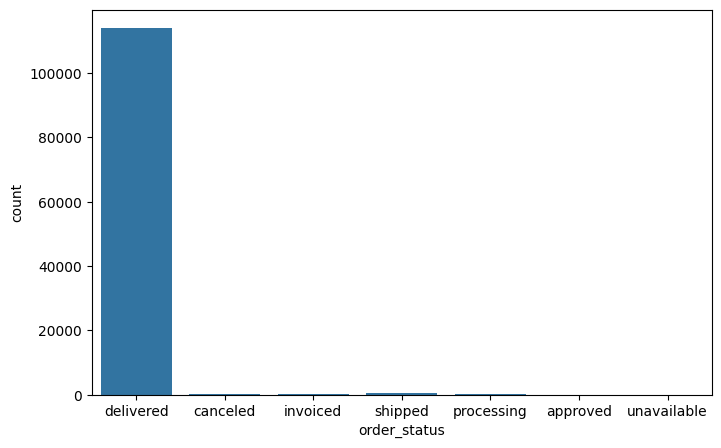

In [32]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['order_status'])

In [33]:
df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,date of shipping_limit,day shipping_limit,month shipping_limit,year shipping_limit,day of review creation,month of review creation,year of review creation,date of review creation,day of answer for the review creation,month of answer for the review creation,year of answer for the review creation,date of answer for the review creation,day of order buy,month of order buy,year of order buy,date of order buy,day of approve for the order,month of approve for the order,year of approve for the order,date of approve for the order,day of deliver for the Shipping company,month of deliver for the Shipping company,year of deliver for the Shipping company,date of deliver for the Shipping company,day of deliver for customer,month of deliver for customer,year of deliver for customer,date of deliver for customer,day of expected to deliver for the customer,month of expected to deliver for the customer,year of expected to deliver for the customer,date of expected to deliver for the customer
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1,credit_card,2,72.19,97ca439bc427b48bc1cd7177abe71365,5,2017-09-21 00:00:00,2017-09-22 10:57:03,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,rj,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,sp,cool_stuff,2017-09-19,19,9,2017,21,9,2017,2017-09-21,22,9,2017,2017-09-22,13,9,2017,2017-09-13,13,9,2017,2017-09-13,19,9,2017,2017-09-19,20.0,9.0,2017.0,2017-09-20,29,9,2017,2017-09-29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1,credit_card,3,259.83,7b07bacd811c4117b742569b04ce3580,4,2017-05-13 00:00:00,2017-05-15 11:34:13,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,sp,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,3471,sao paulo,sp,pet_shop,2017-05-03,3,5,2017,13,5,2017,2017-05-13,15,5,2017,2017-05-15,26,4,2017,2017-04-26,26,4,2017,2017-04-26,4,5,2017,2017-05-04,12.0,5.0,2017.0,2017-05-12,15,5,2017,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1,credit_card,5,216.87,0c5b33dea94867d1ac402749e5438e8b,5,2018-01-23 00:00:00,2018-01-23 16:06:31,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,mg,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,37564,borda da mata,mg,furniture_decor,2018-01-18,18,1,2018,23,1,2018,2018-01-23,23,1,2018,2018-01-23,14,1,2018,2018-01-14,14,1,2018,2018-01-14,16,1,2018,2018-01-16,22.0,1.0,2018.0,2018-01-22,5,2,2018,2018-02-05
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1,credit_card,2,25.78,f4028d019cb58564807486a6aaf33817,4,2018-08-15 00:00:00,2018-08-15 16:39:01,d4eb9395c8c0431ee92fce

In [34]:
df.shape

(114877, 70)

### Generate New Feature To Know Difference between request order and arrive

In [35]:
df['Difference between request order and arrive']=df['date of deliver for customer']-df['date of order buy']

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114877 entries, 0 to 116580
Data columns (total 71 columns):
 #   Column                                         Non-Null Count   Dtype         
---  ------                                         --------------   -----         
 0   order_id                                       114877 non-null  object        
 1   order_item_id                                  114877 non-null  int64         
 2   product_id                                     114877 non-null  object        
 3   seller_id                                      114877 non-null  object        
 4   shipping_limit_date                            114877 non-null  object        
 5   price                                          114877 non-null  float64       
 6   freight_value                                  114877 non-null  float64       
 7   payment_sequential                             114877 non-null  int64         
 8   payment_type                                   11

In [37]:
df['Difference between request order and arrive'] = df['Difference between request order and arrive'].astype(str).str.extract(r'(-?\d+)').astype(float)

### Detect The Customer's City With rate (1,2)

In [38]:
x = [1, 2]  
filtered_df = df[df['review_score'].isin(x)]  
grouped_data = filtered_df.groupby('customer_city').size().reset_index(name='count')  
grouped_data = grouped_data.sort_values(by='count', ascending=False)
grouped_data.head(10)

,customer_city,count
1503,sao paulo,2427
1322,rio de janeiro,1673
185,belo horizonte,474
226,brasilia,392
1360,salvador,339
1240,porto alegre,305
292,campinas,276
497,curitiba,260
1043,niteroi,213
645,guarulhos,193


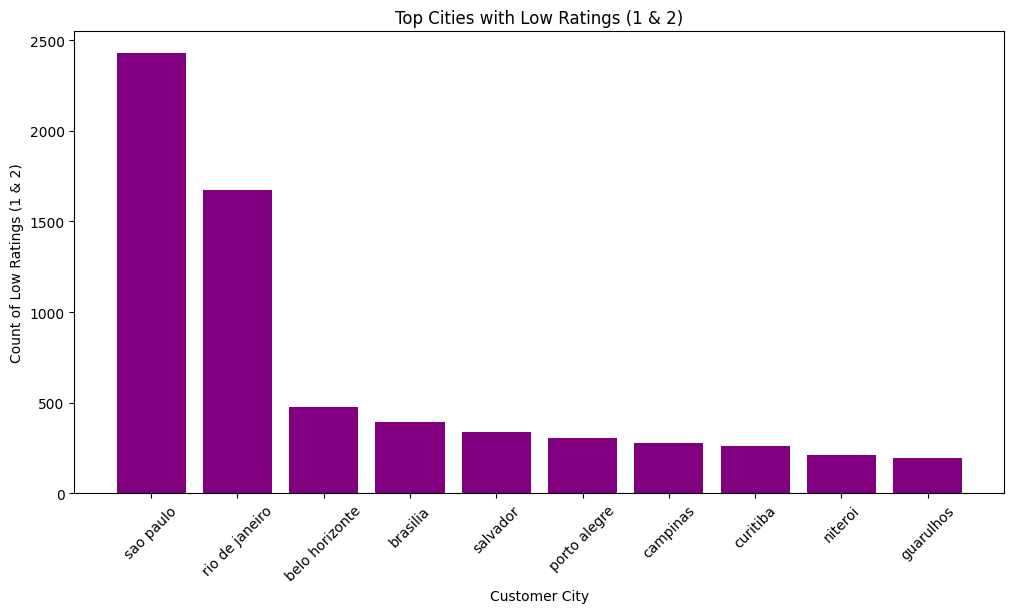

In [39]:
plt.figure(figsize=(12, 6))  
plt.bar(grouped_data['customer_city'][:10], grouped_data['count'][:10], color='purple')  
plt.xlabel('Customer City')  
plt.ylabel('Count of Low Ratings (1 & 2)')  
plt.xticks(rotation=45)  
plt.title('Top Cities with Low Ratings (1 & 2)')  
plt.show()
lowrateC=grouped_data[['customer_city','count']]

In [40]:
df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,date of shipping_limit,day shipping_limit,month shipping_limit,year shipping_limit,day of review creation,month of review creation,year of review creation,date of review creation,day of answer for the review creation,month of answer for the review creation,year of answer for the review creation,date of answer for the review creation,day of order buy,month of order buy,year of order buy,date of order buy,day of approve for the order,month of approve for the order,year of approve for the order,date of approve for the order,day of deliver for the Shipping company,month of deliver for the Shipping company,year of deliver for the Shipping company,date of deliver for the Shipping company,day of deliver for customer,month of deliver for customer,year of deliver for customer,date of deliver for customer,day of expected to deliver for the customer,month of expected to deliver for the customer,year of expected to deliver for the customer,date of expected to deliver for the customer,Difference between request order and arrive
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1,credit_card,2,72.19,97ca439bc427b48bc1cd7177abe71365,5,2017-09-21 00:00:00,2017-09-22 10:57:03,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,rj,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,sp,cool_stuff,2017-09-19,19,9,2017,21,9,2017,2017-09-21,22,9,2017,2017-09-22,13,9,2017,2017-09-13,13,9,2017,2017-09-13,19,9,2017,2017-09-19,20.0,9.0,2017.0,2017-09-20,29,9,2017,2017-09-29,7.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1,credit_card,3,259.83,7b07bacd811c4117b742569b04ce3580,4,2017-05-13 00:00:00,2017-05-15 11:34:13,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,sp,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,3471,sao paulo,sp,pet_shop,2017-05-03,3,5,2017,13,5,2017,2017-05-13,15,5,2017,2017-05-15,26,4,2017,2017-04-26,26,4,2017,2017-04-26,4,5,2017,2017-05-04,12.0,5.0,2017.0,2017-05-12,15,5,2017,2017-05-15,16.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1,credit_card,5,216.87,0c5b33dea94867d1ac402749e5438e8b,5,2018-01-23 00:00:00,2018-01-23 16:06:31,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,mg,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,37564,borda da mata,mg,furniture_decor,2018-01-18,18,1,2018,23,1,2018,2018-01-23,23,1,2018,2018-01-23,14,1,2018,2018-01-14,14,1,2018,2018-01-14,16,1,2018,2018-01-16,22.0,1.0,2018.0,2018-01-22,5,2,2018,2018-02-05,8.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1,credit_card,2,25.78,f4028d019cb58564807486a6aaf33817,4,2018-

### Detect The Customer's City With rate (4,5)

In [41]:
y= [4, 5]  
filtered_df = df[df['review_score'].isin(y)]  
grouped_data = filtered_df.groupby('customer_city').size().reset_index(name='count')  
grouped_data = grouped_data.sort_values(by='count', ascending=False)
grouped_data.head(10)

,customer_city,count
3333,sao paulo,14221
2920,rio de janeiro,5665
418,belo horizonte,2417
514,brasilia,1821
1061,curitiba,1379
654,campinas,1272
2743,porto alegre,1193
1417,guarulhos,1047
3008,salvador,973
3178,sao bernardo do campo,896


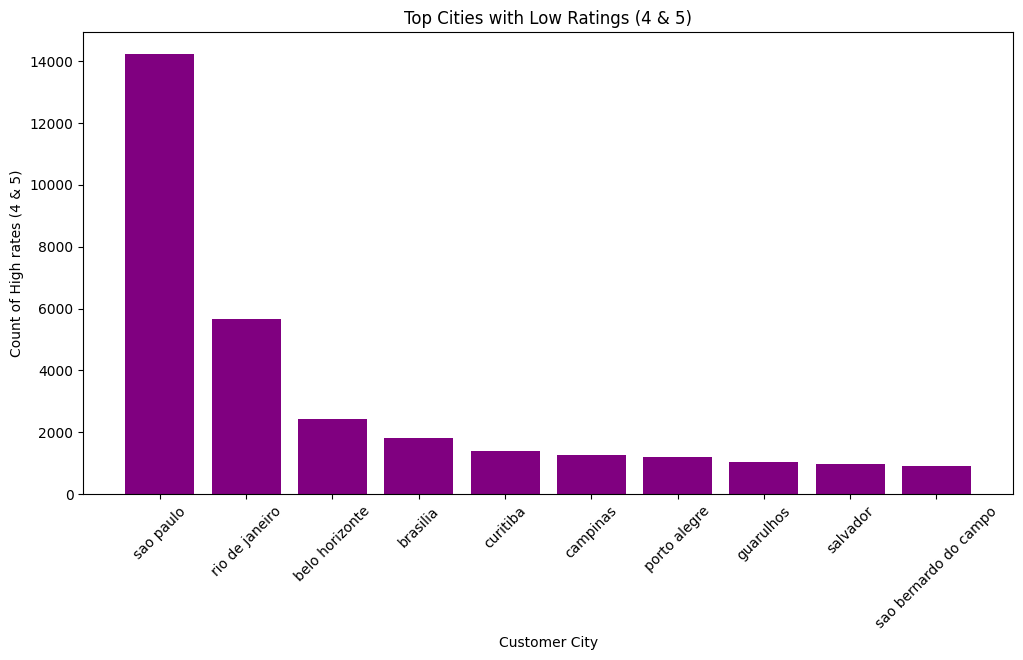

In [42]:
plt.figure(figsize=(12, 6))  
plt.bar(grouped_data['customer_city'][:10], grouped_data['count'][:10], color='purple')  
plt.xlabel('Customer City')  
plt.ylabel('Count of High rates (4 & 5)')  
plt.xticks(rotation=45)  
plt.title('Top Cities with Low Ratings (4 & 5)')  
plt.show()

In [43]:
lowrateC

,customer_city,count
1503,sao paulo,2427
1322,rio de janeiro,1673
185,belo horizonte,474
226,brasilia,392
1360,salvador,339
...,...,...
1702,visconde de maua,1
1701,virginopolis,1
1700,virgem da lapa,1
16,agua limpa,1


In [44]:
df.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,date of shipping_limit,day shipping_limit,month shipping_limit,year shipping_limit,day of review creation,month of review creation,year of review creation,date of review creation,day of answer for the review creation,month of answer for the review creation,year of answer for the review creation,date of answer for the review creation,day of order buy,month of order buy,year of order buy,date of order buy,day of approve for the order,month of approve for the order,year of approve for the order,date of approve for the order,day of deliver for the Shipping company,month of deliver for the Shipping company,year of deliver for the Shipping company,date of deliver for the Shipping company,day of deliver for customer,month of deliver for customer,year of deliver for customer,date of deliver for customer,day of expected to deliver for the customer,month of expected to deliver for the customer,year of expected to deliver for the customer,date of expected to deliver for the customer,Difference between request order and arrive
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,1,credit_card,2,72.19,97ca439bc427b48bc1cd7177abe71365,5,2017-09-21 00:00:00,2017-09-22 10:57:03,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,rj,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,sp,cool_stuff,2017-09-19,19,9,2017,21,9,2017,2017-09-21,22,9,2017,2017-09-22,13,9,2017,2017-09-13,13,9,2017,2017-09-13,19,9,2017,2017-09-19,20.0,9.0,2017.0,2017-09-20,29,9,2017,2017-09-29,7.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,1,credit_card,3,259.83,7b07bacd811c4117b742569b04ce3580,4,2017-05-13 00:00:00,2017-05-15 11:34:13,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,sp,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,3471,sao paulo,sp,pet_shop,2017-05-03,3,5,2017,13,5,2017,2017-05-13,15,5,2017,2017-05-15,26,4,2017,2017-04-26,26,4,2017,2017-04-26,4,5,2017,2017-05-04,12.0,5.0,2017.0,2017-05-12,15,5,2017,2017-05-15,16.0


### Detect the year of the purchase order

<Axes: xlabel='year of order buy', ylabel='count'>

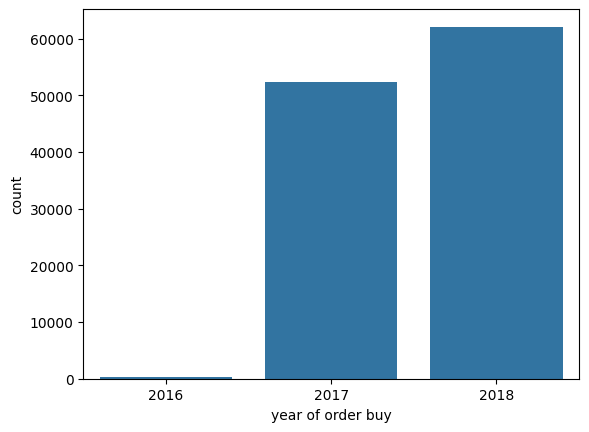

In [45]:
sns.countplot(x='year of order buy',data=df)

In [46]:
df['year of order buy'].value_counts()

year of order buy
2018    62094
2017    52395
2016      388
Name: count, dtype: int64

##### Detect The Review Score

In [47]:
df['review_score'].value_counts()

review_score
5    65336
4    21935
1    13898
3     9705
2     4003
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Review Scores')

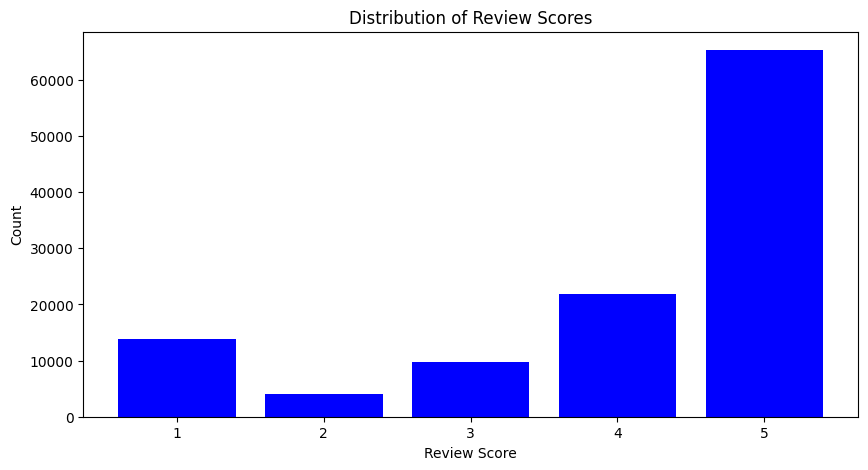

In [48]:
c = df['review_score'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
plt.bar(c.index, c.values, color='blue')
plt.xlabel("Review Score")
plt.ylabel("Count")
plt.title("Distribution of Review Scores")

In [49]:
df.head(1)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,date of shipping_limit,day shipping_limit,month shipping_limit,year shipping_limit,day of review creation,month of review creation,year of review creation,date of review creation,day of answer for the review creation,month of answer for the review creation,year of answer for the review creation,date of answer for the review creation,day of order buy,month of order buy,year of order buy,date of order buy,day of approve for the order,month of approve for the order,year of approve for the order,date of approve for the order,day of deliver for the Shipping company,month of deliver for the Shipping company,year of deliver for the Shipping company,date of deliver for the Shipping company,day of deliver for customer,month of deliver for customer,year of deliver for customer,date of deliver for customer,day of expected to deliver for the customer,month of expected to deliver for the customer,year of expected to deliver for the customer,date of expected to deliver for the customer,Difference between request order and arrive
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,1,credit_card,2,72.19,97ca439bc427b48bc1cd7177abe71365,5,2017-09-21 00:00:00,2017-09-22 10:57:03,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,rj,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,sp,cool_stuff,2017-09-19,19,9,2017,21,9,2017,2017-09-21,22,9,2017,2017-09-22,13,9,2017,2017-09-13,13,9,2017,2017-09-13,19,9,2017,2017-09-19,20.0,9.0,2017.0,2017-09-20,29,9,2017,2017-09-29,7.0


### Detect the quantity of the photo product

In [50]:
df['product_photos_qty'].value_counts()

product_photos_qty
1.0     58064
2.0     22726
3.0     12811
4.0      8713
5.0      5516
6.0      3889
7.0      1539
8.0       761
10.0      348
9.0       312
11.0       73
12.0       60
13.0       30
15.0       12
17.0       11
14.0        6
18.0        4
20.0        1
19.0        1
Name: count, dtype: int64

### Detect The Relationship between product_photos_qty and payment_value

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, '1.0'),
  Text(1, 0, '2.0'),
  Text(2, 0, '3.0'),
  Text(3, 0, '4.0'),
  Text(4, 0, '5.0'),
  Text(5, 0, '6.0'),
  Text(6, 0, '7.0'),
  Text(7, 0, '8.0'),
  Text(8, 0, '9.0'),
  Text(9, 0, '10.0'),
  Text(10, 0, '11.0'),
  Text(11, 0, '12.0'),
  Text(12, 0, '13.0'),
  Text(13, 0, '14.0'),
  Text(14, 0, '15.0'),
  Text(15, 0, '17.0'),
  Text(16, 0, '18.0'),
  Text(17, 0, '19.0'),
  Text(18, 0, '20.0')])

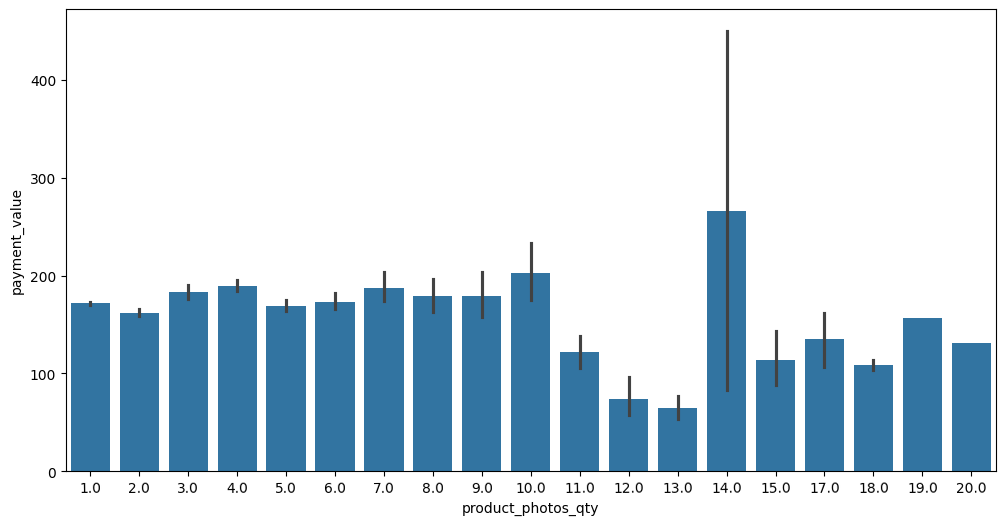

In [51]:
plt.figure(figsize=(12,6))
sns.barplot(x='product_photos_qty',y='payment_value',data=df)
plt.xticks(rotation=1)

In [52]:
df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,date of shipping_limit,day shipping_limit,month shipping_limit,year shipping_limit,day of review creation,month of review creation,year of review creation,date of review creation,day of answer for the review creation,month of answer for the review creation,year of answer for the review creation,date of answer for the review creation,day of order buy,month of order buy,year of order buy,date of order buy,day of approve for the order,month of approve for the order,year of approve for the order,date of approve for the order,day of deliver for the Shipping company,month of deliver for the Shipping company,year of deliver for the Shipping company,date of deliver for the Shipping company,day of deliver for customer,month of deliver for customer,year of deliver for customer,date of deliver for customer,day of expected to deliver for the customer,month of expected to deliver for the customer,year of expected to deliver for the customer,date of expected to deliver for the customer,Difference between request order and arrive
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1,credit_card,2,72.19,97ca439bc427b48bc1cd7177abe71365,5,2017-09-21 00:00:00,2017-09-22 10:57:03,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,rj,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,sp,cool_stuff,2017-09-19,19,9,2017,21,9,2017,2017-09-21,22,9,2017,2017-09-22,13,9,2017,2017-09-13,13,9,2017,2017-09-13,19,9,2017,2017-09-19,20.0,9.0,2017.0,2017-09-20,29,9,2017,2017-09-29,7.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1,credit_card,3,259.83,7b07bacd811c4117b742569b04ce3580,4,2017-05-13 00:00:00,2017-05-15 11:34:13,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,sp,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,3471,sao paulo,sp,pet_shop,2017-05-03,3,5,2017,13,5,2017,2017-05-13,15,5,2017,2017-05-15,26,4,2017,2017-04-26,26,4,2017,2017-04-26,4,5,2017,2017-05-04,12.0,5.0,2017.0,2017-05-12,15,5,2017,2017-05-15,16.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1,credit_card,5,216.87,0c5b33dea94867d1ac402749e5438e8b,5,2018-01-23 00:00:00,2018-01-23 16:06:31,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,mg,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,37564,borda da mata,mg,furniture_decor,2018-01-18,18,1,2018,23,1,2018,2018-01-23,23,1,2018,2018-01-23,14,1,2018,2018-01-14,14,1,2018,2018-01-14,16,1,2018,2018-01-16,22.0,1.0,2018.0,2018-01-22,5,2,2018,2018-02-05,8.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1,credit_card,2,25.78,f4028d019cb58564807486a6aaf33817,4,2018-

### Generate New Column ( VOLUME )

In [53]:
df['volume']=df['product_length_cm']*df['product_height_cm']*df['product_width_cm']

In [54]:
df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,date of shipping_limit,day shipping_limit,month shipping_limit,year shipping_limit,day of review creation,month of review creation,year of review creation,date of review creation,day of answer for the review creation,month of answer for the review creation,year of answer for the review creation,date of answer for the review creation,day of order buy,month of order buy,year of order buy,date of order buy,day of approve for the order,month of approve for the order,year of approve for the order,date of approve for the order,day of deliver for the Shipping company,month of deliver for the Shipping company,year of deliver for the Shipping company,date of deliver for the Shipping company,day of deliver for customer,month of deliver for customer,year of deliver for customer,date of deliver for customer,day of expected to deliver for the customer,month of expected to deliver for the customer,year of expected to deliver for the customer,date of expected to deliver for the customer,Difference between request order and arrive,volume
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1,credit_card,2,72.19,97ca439bc427b48bc1cd7177abe71365,5,2017-09-21 00:00:00,2017-09-22 10:57:03,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,rj,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,sp,cool_stuff,2017-09-19,19,9,2017,21,9,2017,2017-09-21,22,9,2017,2017-09-22,13,9,2017,2017-09-13,13,9,2017,2017-09-13,19,9,2017,2017-09-19,20.0,9.0,2017.0,2017-09-20,29,9,2017,2017-09-29,7.0,3528.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1,credit_card,3,259.83,7b07bacd811c4117b742569b04ce3580,4,2017-05-13 00:00:00,2017-05-15 11:34:13,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,sp,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,3471,sao paulo,sp,pet_shop,2017-05-03,3,5,2017,13,5,2017,2017-05-13,15,5,2017,2017-05-15,26,4,2017,2017-04-26,26,4,2017,2017-04-26,4,5,2017,2017-05-04,12.0,5.0,2017.0,2017-05-12,15,5,2017,2017-05-15,16.0,60000.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1,credit_card,5,216.87,0c5b33dea94867d1ac402749e5438e8b,5,2018-01-23 00:00:00,2018-01-23 16:06:31,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,mg,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,37564,borda da mata,mg,furniture_decor,2018-01-18,18,1,2018,23,1,2018,2018-01-23,23,1,2018,2018-01-23,14,1,2018,2018-01-14,14,1,2018,2018-01-14,16,1,2018,2018-01-16,22.0,1.0,2018.0,2018-01-22,5,2,2018,2018-02-05,8.0,14157.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1,credit_card,2,25.78,f4028d019c

### Detect The Relationship between Volume and payment_value

(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.,
        300000., 350000.]),
 [Text(-50000.0, 0, '−50000'),
  Text(0.0, 0, '0'),
  Text(50000.0, 0, '50000'),
  Text(100000.0, 0, '100000'),
  Text(150000.0, 0, '150000'),
  Text(200000.0, 0, '200000'),
  Text(250000.0, 0, '250000'),
  Text(300000.0, 0, '300000'),
  Text(350000.0, 0, '350000')])

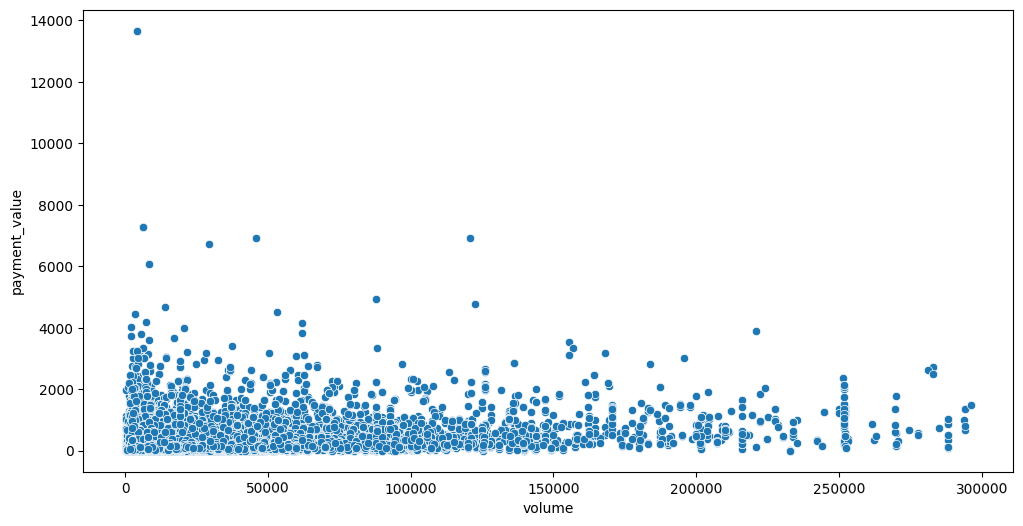

In [55]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='volume',y='payment_value',data=df)
plt.xticks(rotation=1)

### Detect The Relationship between Weight(g) and payment_value

(array([-5000.,     0.,  5000., 10000., 15000., 20000., 25000., 30000.,
        35000., 40000., 45000.]),
 [Text(-5000.0, 0, '−5000'),
  Text(0.0, 0, '0'),
  Text(5000.0, 0, '5000'),
  Text(10000.0, 0, '10000'),
  Text(15000.0, 0, '15000'),
  Text(20000.0, 0, '20000'),
  Text(25000.0, 0, '25000'),
  Text(30000.0, 0, '30000'),
  Text(35000.0, 0, '35000'),
  Text(40000.0, 0, '40000'),
  Text(45000.0, 0, '45000')])

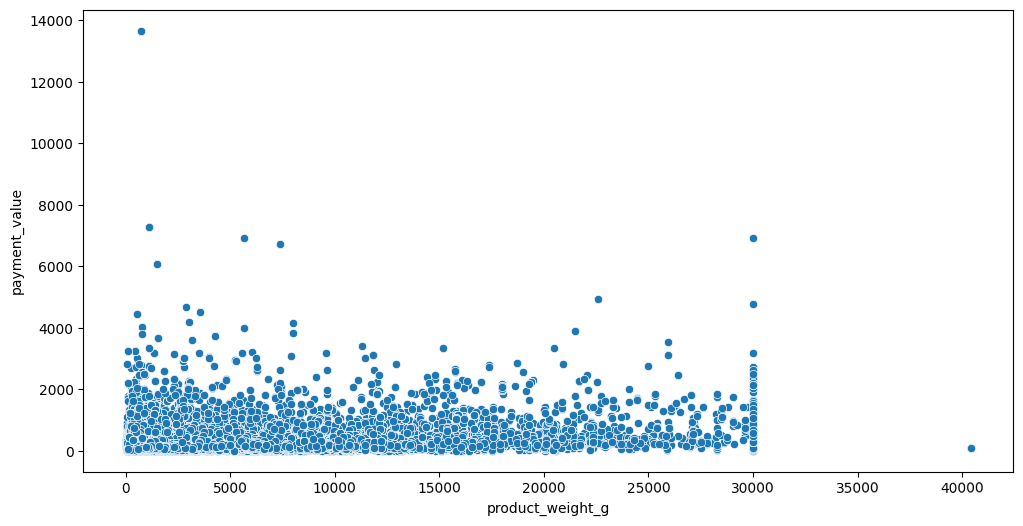

In [56]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='product_weight_g',y='payment_value',data=df)
plt.xticks(rotation=1)

### Detect The Relationship between volume and freight_value

(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.,
        300000., 350000.]),
 [Text(-50000.0, 0, '−50000'),
  Text(0.0, 0, '0'),
  Text(50000.0, 0, '50000'),
  Text(100000.0, 0, '100000'),
  Text(150000.0, 0, '150000'),
  Text(200000.0, 0, '200000'),
  Text(250000.0, 0, '250000'),
  Text(300000.0, 0, '300000'),
  Text(350000.0, 0, '350000')])

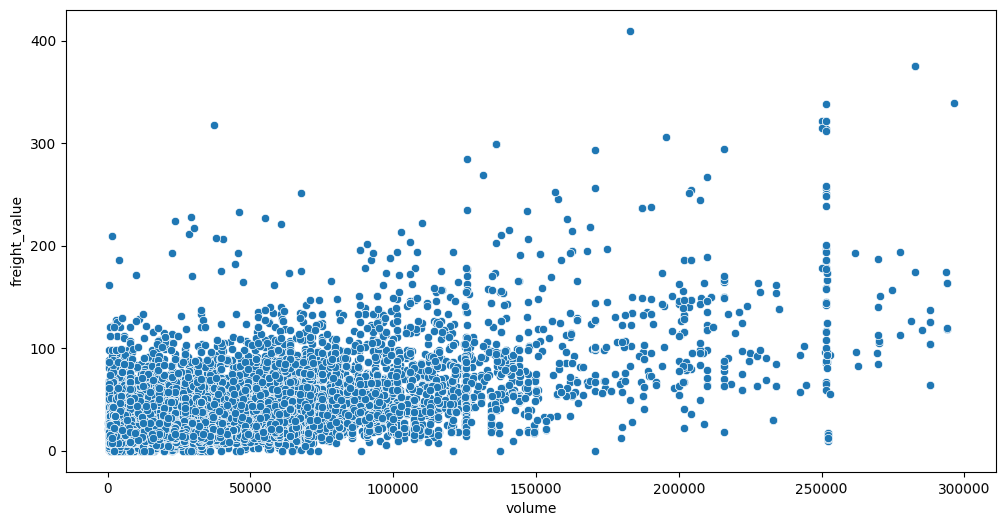

In [57]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='volume',y='freight_value',data=df)
plt.xticks(rotation=1)

(array([-5000.,     0.,  5000., 10000., 15000., 20000., 25000., 30000.,
        35000., 40000., 45000.]),
 [Text(-5000.0, 0, '−5000'),
  Text(0.0, 0, '0'),
  Text(5000.0, 0, '5000'),
  Text(10000.0, 0, '10000'),
  Text(15000.0, 0, '15000'),
  Text(20000.0, 0, '20000'),
  Text(25000.0, 0, '25000'),
  Text(30000.0, 0, '30000'),
  Text(35000.0, 0, '35000'),
  Text(40000.0, 0, '40000'),
  Text(45000.0, 0, '45000')])

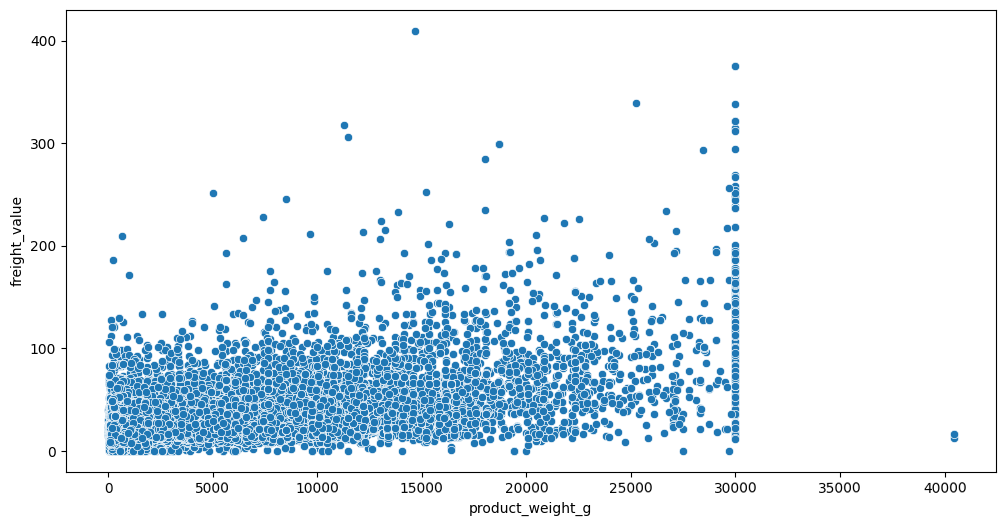

In [58]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='product_weight_g',y='freight_value',data=df)
plt.xticks(rotation=1)

### Detect The Correlation

In [59]:
df[['volume', 'freight_value']].corr()


,volume,freight_value
volume,1.000000,0.586001
freight_value,0.586001,1.000000


In [60]:
df[['product_weight_g', 'freight_value']].corr()


,product_weight_g,freight_value
product_weight_g,1.000000,0.613163
freight_value,0.613163,1.000000


In [61]:
df[['product_weight_g', 'price']].corr()


,product_weight_g,price
product_weight_g,1.000000,0.340612
price,0.340612,1.000000


In [62]:
df[['volume', 'price']].corr()


,volume,price
volume,1.000000,0.300223
price,0.300223,1.000000


In [63]:
df[['review_score','Difference between request order and arrive']].corr()

,review_score,Difference between request order and arrive
review_score,1.000000,-0.284503
Difference between request order and arrive,-0.284503,1.000000


In [64]:
df.head(1)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,date of shipping_limit,day shipping_limit,month shipping_limit,year shipping_limit,day of review creation,month of review creation,year of review creation,date of review creation,day of answer for the review creation,month of answer for the review creation,year of answer for the review creation,date of answer for the review creation,day of order buy,month of order buy,year of order buy,date of order buy,day of approve for the order,month of approve for the order,year of approve for the order,date of approve for the order,day of deliver for the Shipping company,month of deliver for the Shipping company,year of deliver for the Shipping company,date of deliver for the Shipping company,day of deliver for customer,month of deliver for customer,year of deliver for customer,date of deliver for customer,day of expected to deliver for the customer,month of expected to deliver for the customer,year of expected to deliver for the customer,date of expected to deliver for the customer,Difference between request order and arrive,volume
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,1,credit_card,2,72.19,97ca439bc427b48bc1cd7177abe71365,5,2017-09-21 00:00:00,2017-09-22 10:57:03,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,rj,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,sp,cool_stuff,2017-09-19,19,9,2017,21,9,2017,2017-09-21,22,9,2017,2017-09-22,13,9,2017,2017-09-13,13,9,2017,2017-09-13,19,9,2017,2017-09-19,20.0,9.0,2017.0,2017-09-20,29,9,2017,2017-09-29,7.0,3528.0


In [65]:
selected_columns = [
    "price", "freight_value", "payment_installments", "review_score",
    "product_description_lenght", "product_photos_qty", "product_weight_g",
    "product_length_cm", "product_height_cm", "product_width_cm",
    "Difference between request order and arrive", "volume"
]
corr_matrix = df[selected_columns].corr()
corr_matrix

,price,freight_value,payment_installments,review_score,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,Difference between request order and arrive,volume
price,1.000000,0.415823,0.278667,-0.000975,0.202684,0.052967,0.340612,0.145041,0.224413,0.173170,0.053397,0.300223
freight_value,0.415823,1.000000,0.185468,-0.036828,0.097189,0.021931,0.613163,0.306929,0.393070,0.323064,0.153211,0.586001
payment_installments,0.278667,0.185468,1.000000,-0.045035,0.035656,-0.000569,0.178301,0.116867,0.120950,0.137375,0.037076,0.157545
review_score,-0.000975,-0.036828,-0.045035,1.000000,0.011571,0.022436,-0.031075,-0.024448,-0.026324,-0.014370,-0.284503,-0.030104
product_description_lenght,0.202684,0.097189,0.035656,0.011571,1.000000,0.118072,0.063400,0.007595,0.074469,-0.068745,0.013107,0.021029
product_photos_qty,0.052967,0.021931,-0.000569,0.022436,0.118072,1.000000,0.021750,0.044924,-0.033999,0.007184,-0.022198,0.010302
product_weight_g,0.340612,0.613163,0.178301,-0.031075,0.063400,0.021750,1.000000,0.461295,0.582385,0.505381,0.072383,0.804338
product_length_cm,0.145041,0.306929,0.116867,-0.024448,0.007595,0.044924,0.461295,1.000000,0.189267,0.533545,0.057118,0.540195
product_height_cm,0.224413,0.393070,0.120950,-0.026324,0.074469,-0.033999,0.582385,0.189267,1.000000,0.276440,0.058469,0.722104
product_width_cm,0.173170,0.323064,0.137375,-0.014370,-0.068745,0.007184,0.505381,0.533545,0.276440,1.000000,0.035016,0.622322


### Detect The payment type

In [66]:
df['payment_type'].value_counts()

payment_type
credit_card    84754
boleto         22350
voucher         6138
debit_card      1635
Name: count, dtype: int64

<Axes: xlabel='payment_type', ylabel='count'>

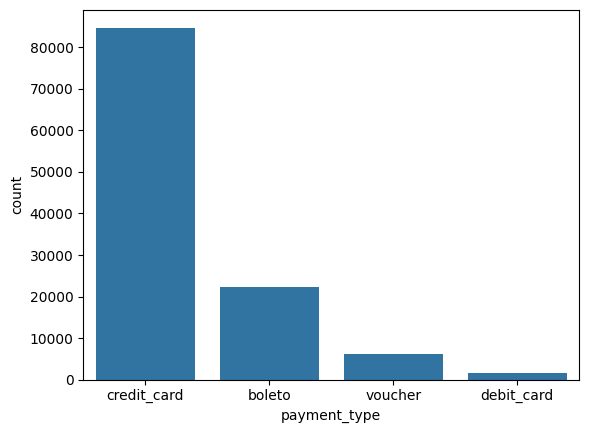

In [67]:
sns.countplot(x='payment_type',data=df)

### Know The Most Common Payment Method for Each Review Score

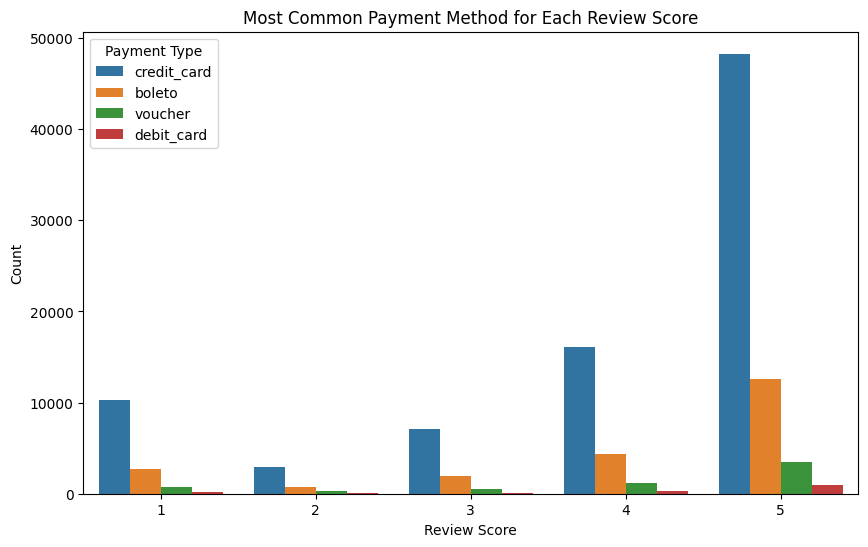

In [68]:
plt.figure(figsize=(10, 6))
sns.countplot(x="review_score", hue="payment_type", data=df)
plt.title("Most Common Payment Method for Each Review Score")
plt.xlabel("Review Score")
plt.ylabel("Count")
plt.legend(title="Payment Type")
plt.show()

In [69]:
df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,date of shipping_limit,day shipping_limit,month shipping_limit,year shipping_limit,day of review creation,month of review creation,year of review creation,date of review creation,day of answer for the review creation,month of answer for the review creation,year of answer for the review creation,date of answer for the review creation,day of order buy,month of order buy,year of order buy,date of order buy,day of approve for the order,month of approve for the order,year of approve for the order,date of approve for the order,day of deliver for the Shipping company,month of deliver for the Shipping company,year of deliver for the Shipping company,date of deliver for the Shipping company,day of deliver for customer,month of deliver for customer,year of deliver for customer,date of deliver for customer,day of expected to deliver for the customer,month of expected to deliver for the customer,year of expected to deliver for the customer,date of expected to deliver for the customer,Difference between request order and arrive,volume
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1,credit_card,2,72.19,97ca439bc427b48bc1cd7177abe71365,5,2017-09-21 00:00:00,2017-09-22 10:57:03,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,rj,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,sp,cool_stuff,2017-09-19,19,9,2017,21,9,2017,2017-09-21,22,9,2017,2017-09-22,13,9,2017,2017-09-13,13,9,2017,2017-09-13,19,9,2017,2017-09-19,20.0,9.0,2017.0,2017-09-20,29,9,2017,2017-09-29,7.0,3528.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1,credit_card,3,259.83,7b07bacd811c4117b742569b04ce3580,4,2017-05-13 00:00:00,2017-05-15 11:34:13,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,sp,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,3471,sao paulo,sp,pet_shop,2017-05-03,3,5,2017,13,5,2017,2017-05-13,15,5,2017,2017-05-15,26,4,2017,2017-04-26,26,4,2017,2017-04-26,4,5,2017,2017-05-04,12.0,5.0,2017.0,2017-05-12,15,5,2017,2017-05-15,16.0,60000.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1,credit_card,5,216.87,0c5b33dea94867d1ac402749e5438e8b,5,2018-01-23 00:00:00,2018-01-23 16:06:31,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,mg,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,37564,borda da mata,mg,furniture_decor,2018-01-18,18,1,2018,23,1,2018,2018-01-23,23,1,2018,2018-01-23,14,1,2018,2018-01-14,14,1,2018,2018-01-14,16,1,2018,2018-01-16,22.0,1.0,2018.0,2018-01-22,5,2,2018,2018-02-05,8.0,14157.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1,credit_card,2,25.78,f4028d019c

### Generate New Column [days of answer for review]

In [70]:
df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,date of shipping_limit,day shipping_limit,month shipping_limit,year shipping_limit,day of review creation,month of review creation,year of review creation,date of review creation,day of answer for the review creation,month of answer for the review creation,year of answer for the review creation,date of answer for the review creation,day of order buy,month of order buy,year of order buy,date of order buy,day of approve for the order,month of approve for the order,year of approve for the order,date of approve for the order,day of deliver for the Shipping company,month of deliver for the Shipping company,year of deliver for the Shipping company,date of deliver for the Shipping company,day of deliver for customer,month of deliver for customer,year of deliver for customer,date of deliver for customer,day of expected to deliver for the customer,month of expected to deliver for the customer,year of expected to deliver for the customer,date of expected to deliver for the customer,Difference between request order and arrive,volume
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1,credit_card,2,72.19,97ca439bc427b48bc1cd7177abe71365,5,2017-09-21 00:00:00,2017-09-22 10:57:03,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,rj,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,sp,cool_stuff,2017-09-19,19,9,2017,21,9,2017,2017-09-21,22,9,2017,2017-09-22,13,9,2017,2017-09-13,13,9,2017,2017-09-13,19,9,2017,2017-09-19,20.0,9.0,2017.0,2017-09-20,29,9,2017,2017-09-29,7.0,3528.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1,credit_card,3,259.83,7b07bacd811c4117b742569b04ce3580,4,2017-05-13 00:00:00,2017-05-15 11:34:13,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,sp,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,3471,sao paulo,sp,pet_shop,2017-05-03,3,5,2017,13,5,2017,2017-05-13,15,5,2017,2017-05-15,26,4,2017,2017-04-26,26,4,2017,2017-04-26,4,5,2017,2017-05-04,12.0,5.0,2017.0,2017-05-12,15,5,2017,2017-05-15,16.0,60000.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1,credit_card,5,216.87,0c5b33dea94867d1ac402749e5438e8b,5,2018-01-23 00:00:00,2018-01-23 16:06:31,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,mg,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,37564,borda da mata,mg,furniture_decor,2018-01-18,18,1,2018,23,1,2018,2018-01-23,23,1,2018,2018-01-23,14,1,2018,2018-01-14,14,1,2018,2018-01-14,16,1,2018,2018-01-16,22.0,1.0,2018.0,2018-01-22,5,2,2018,2018-02-05,8.0,14157.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1,credit_card,2,25.78,f4028d019c

### Generate New Column [days of answer for review]

In [71]:
df['days of answer for review']=df['date of answer for the review creation']-df['date of review creation']

In [72]:
df['days of answer for review'] = df['days of answer for review'].astype(str).str.extract(r'(\d+)').astype(float)

### Detect The Correlation Between RS and days of answer for review

In [73]:
df[['review_score','days of answer for review']].corr()

,review_score,days of answer for review
review_score,1.000000,0.007629
days of answer for review,0.007629,1.000000


### Know the number of days taken to respond to the review

In [74]:
df['days of answer for review'].value_counts()

days of answer for review
1.0      36169
0.0      27552
2.0      18374
3.0      16463
4.0       5308
         ...  
224.0        1
284.0        1
133.0        1
102.0        1
245.0        1
Name: count, Length: 210, dtype: int64

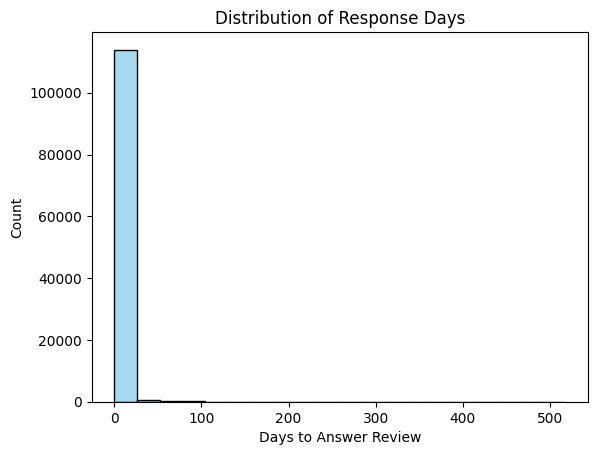

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(x=df['days of answer for review'], bins=20, color='skyblue')
plt.xlabel('Days to Answer Review')
plt.ylabel('Count')
plt.title('Distribution of Response Days')
plt.show()

### Detect The Value Counts For Products Name

In [76]:
df['product_category_name'].value_counts().head()

product_category_name
cama_mesa_banho           11880
beleza_saude               9875
esporte_lazer              8867
moveis_decoracao           8712
informatica_acessorios     8011
Name: count, dtype: int64

In [77]:
df['product_category_name'].value_counts().tail()

product_category_name
artes_e_artesanato               24
la_cuisine                       16
cds_dvds_musicais                14
fashion_roupa_infanto_juvenil     8
seguros_e_servicos                2
Name: count, dtype: int64

### Detect The payment_installments

In [78]:
df['payment_installments'].value_counts()

payment_installments
1     57169
2     13327
3     11481
4      7807
10     6792
5      5906
8      4947
6      4529
7      1779
9       710
12      164
15       90
18       38
24       34
11       25
20       20
13       18
14       16
16        7
17        7
21        6
0         3
23        1
22        1
Name: count, dtype: int64

In [79]:
df.head(1)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,date of shipping_limit,day shipping_limit,month shipping_limit,year shipping_limit,day of review creation,month of review creation,year of review creation,date of review creation,day of answer for the review creation,month of answer for the review creation,year of answer for the review creation,date of answer for the review creation,day of order buy,month of order buy,year of order buy,date of order buy,day of approve for the order,month of approve for the order,year of approve for the order,date of approve for the order,day of deliver for the Shipping company,month of deliver for the Shipping company,year of deliver for the Shipping company,date of deliver for the Shipping company,day of deliver for customer,month of deliver for customer,year of deliver for customer,date of deliver for customer,day of expected to deliver for the customer,month of expected to deliver for the customer,year of expected to deliver for the customer,date of expected to deliver for the customer,Difference between request order and arrive,volume,days of answer for review
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,1,credit_card,2,72.19,97ca439bc427b48bc1cd7177abe71365,5,2017-09-21 00:00:00,2017-09-22 10:57:03,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,rj,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,sp,cool_stuff,2017-09-19,19,9,2017,21,9,2017,2017-09-21,22,9,2017,2017-09-22,13,9,2017,2017-09-13,13,9,2017,2017-09-13,19,9,2017,2017-09-19,20.0,9.0,2017.0,2017-09-20,29,9,2017,2017-09-29,7.0,3528.0,1.0


In [80]:
df.shape

(114877, 73)

### Generate New Column [Seasons]

In [81]:
condition=[(df['month of order buy'].isin([12,1,2])),(df['month of order buy'].isin([3,4,5])),(df['month of order buy'].isin([6,7,8])),(df['month of order buy'].isin([9,10,11]))]
choice=['Winter','Spring','Summer','Fall']
df['seasons']=np.select(condition,choice,default='Nothing')
df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,date of shipping_limit,day shipping_limit,month shipping_limit,year shipping_limit,day of review creation,month of review creation,year of review creation,date of review creation,day of answer for the review creation,month of answer for the review creation,year of answer for the review creation,date of answer for the review creation,day of order buy,month of order buy,year of order buy,date of order buy,day of approve for the order,month of approve for the order,year of approve for the order,date of approve for the order,day of deliver for the Shipping company,month of deliver for the Shipping company,year of deliver for the Shipping company,date of deliver for the Shipping company,day of deliver for customer,month of deliver for customer,year of deliver for customer,date of deliver for customer,day of expected to deliver for the customer,month of expected to deliver for the customer,year of expected to deliver for the customer,date of expected to deliver for the customer,Difference between request order and arrive,volume,days of answer for review,seasons
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1,credit_card,2,72.19,97ca439bc427b48bc1cd7177abe71365,5,2017-09-21 00:00:00,2017-09-22 10:57:03,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,rj,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,sp,cool_stuff,2017-09-19,19,9,2017,21,9,2017,2017-09-21,22,9,2017,2017-09-22,13,9,2017,2017-09-13,13,9,2017,2017-09-13,19,9,2017,2017-09-19,20.0,9.0,2017.0,2017-09-20,29,9,2017,2017-09-29,7.0,3528.0,1.0,Fall
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1,credit_card,3,259.83,7b07bacd811c4117b742569b04ce3580,4,2017-05-13 00:00:00,2017-05-15 11:34:13,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,sp,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,3471,sao paulo,sp,pet_shop,2017-05-03,3,5,2017,13,5,2017,2017-05-13,15,5,2017,2017-05-15,26,4,2017,2017-04-26,26,4,2017,2017-04-26,4,5,2017,2017-05-04,12.0,5.0,2017.0,2017-05-12,15,5,2017,2017-05-15,16.0,60000.0,2.0,Spring
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1,credit_card,5,216.87,0c5b33dea94867d1ac402749e5438e8b,5,2018-01-23 00:00:00,2018-01-23 16:06:31,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,mg,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,37564,borda da mata,mg,furniture_decor,2018-01-18,18,1,2018,23,1,2018,2018-01-23,23,1,2018,2018-01-23,14,1,2018,2018-01-14,14,1,2018,2018-01-14,16,1,2018,2018-01-16,22.0,1.0,2018.0,2018-01-22,5,2,2018,2018-02-05,8.0,14157.0,0.0,Winter
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4

### Detect the season with the highest number of purchases

<Axes: xlabel='seasons', ylabel='count'>

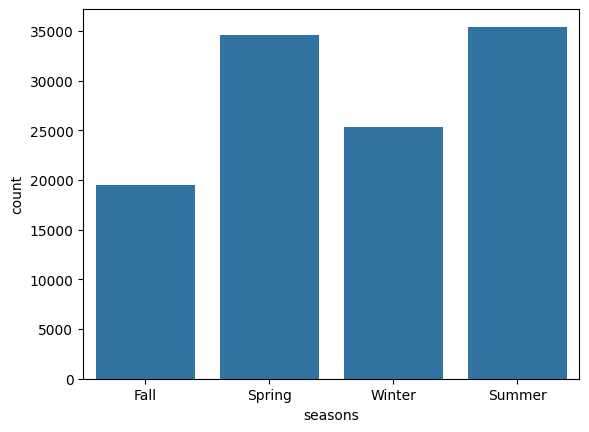

In [82]:
sns.countplot(x='seasons',data=df)

In [83]:
df['seasons'].value_counts()

seasons
Summer    35420
Spring    34611
Winter    25310
Fall      19536
Name: count, dtype: int64

### Detect how the difference between request and arrival time varies by season

C:\Users\test\AppData\Local\Temp\ipykernel_14380\454566382.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='seasons', y='Difference between request order and arrive', data=df, ci=None)


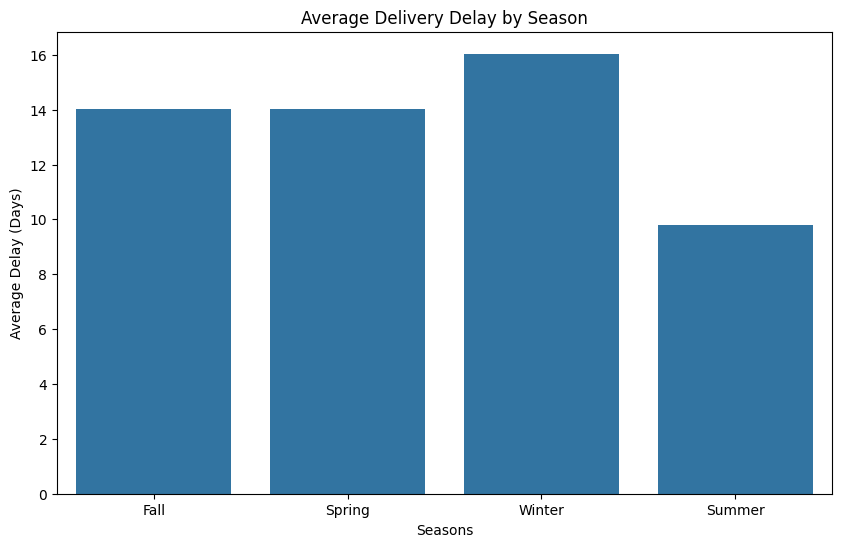

In [84]:
plt.figure(figsize=(10,6))
sns.barplot(x='seasons', y='Difference between request order and arrive', data=df, ci=None)
plt.title('Average Delivery Delay by Season')
plt.xlabel('Seasons')
plt.ylabel('Average Delay (Days)')
plt.show()

### Analyze the review scores across seasons

In [85]:
df0=df.groupby(['seasons','review_score']).size().reset_index(name='count')
df0

,seasons,review_score,count
0,Fall,1,2561
1,Fall,2,673
2,Fall,3,1704
3,Fall,4,3773
4,Fall,5,10825
5,Spring,1,4465
6,Spring,2,1189
7,Spring,3,3022
8,Spring,4,6749
9,Spring,5,19186


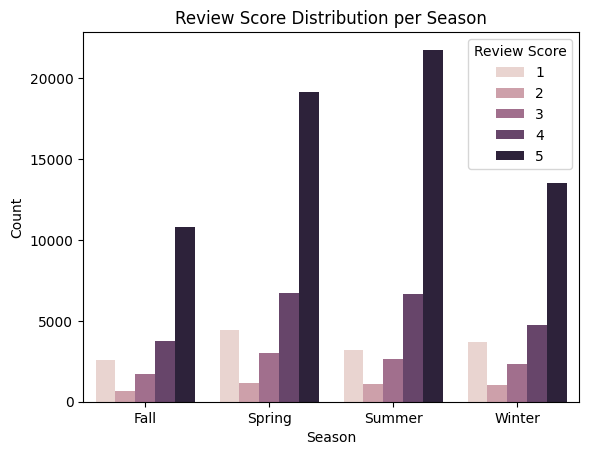

In [86]:
sns.barplot(x='seasons', y='count', hue='review_score', data=df0)
plt.title('Review Score Distribution per Season')
plt.ylabel('Count')
plt.xlabel('Season')
plt.legend(title='Review Score')
plt.show()

In [87]:
df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,date of shipping_limit,day shipping_limit,month shipping_limit,year shipping_limit,day of review creation,month of review creation,year of review creation,date of review creation,day of answer for the review creation,month of answer for the review creation,year of answer for the review creation,date of answer for the review creation,day of order buy,month of order buy,year of order buy,date of order buy,day of approve for the order,month of approve for the order,year of approve for the order,date of approve for the order,day of deliver for the Shipping company,month of deliver for the Shipping company,year of deliver for the Shipping company,date of deliver for the Shipping company,day of deliver for customer,month of deliver for customer,year of deliver for customer,date of deliver for customer,day of expected to deliver for the customer,month of expected to deliver for the customer,year of expected to deliver for the customer,date of expected to deliver for the customer,Difference between request order and arrive,volume,days of answer for review,seasons
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1,credit_card,2,72.19,97ca439bc427b48bc1cd7177abe71365,5,2017-09-21 00:00:00,2017-09-22 10:57:03,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,rj,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,sp,cool_stuff,2017-09-19,19,9,2017,21,9,2017,2017-09-21,22,9,2017,2017-09-22,13,9,2017,2017-09-13,13,9,2017,2017-09-13,19,9,2017,2017-09-19,20.0,9.0,2017.0,2017-09-20,29,9,2017,2017-09-29,7.0,3528.0,1.0,Fall
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1,credit_card,3,259.83,7b07bacd811c4117b742569b04ce3580,4,2017-05-13 00:00:00,2017-05-15 11:34:13,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,sp,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,3471,sao paulo,sp,pet_shop,2017-05-03,3,5,2017,13,5,2017,2017-05-13,15,5,2017,2017-05-15,26,4,2017,2017-04-26,26,4,2017,2017-04-26,4,5,2017,2017-05-04,12.0,5.0,2017.0,2017-05-12,15,5,2017,2017-05-15,16.0,60000.0,2.0,Spring
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1,credit_card,5,216.87,0c5b33dea94867d1ac402749e5438e8b,5,2018-01-23 00:00:00,2018-01-23 16:06:31,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,mg,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,37564,borda da mata,mg,furniture_decor,2018-01-18,18,1,2018,23,1,2018,2018-01-23,23,1,2018,2018-01-23,14,1,2018,2018-01-14,14,1,2018,2018-01-14,16,1,2018,2018-01-16,22.0,1.0,2018.0,2018-01-22,5,2,2018,2018-02-05,8.0,14157.0,0.0,Winter
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4

### Show the freight value in each season

In [88]:
seasonal_shipping_cost = df.groupby("seasons")["freight_value"].mean()
print(seasonal_shipping_cost)

seasons
Fall      19.682301
Spring    20.004459
Summer    21.011599
Winter    18.992324
Name: freight_value, dtype: float64


C:\Users\test\AppData\Local\Temp\ipykernel_14380\2801501327.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasonal_shipping_cost.index, y=seasonal_shipping_cost.values, palette="Blues")


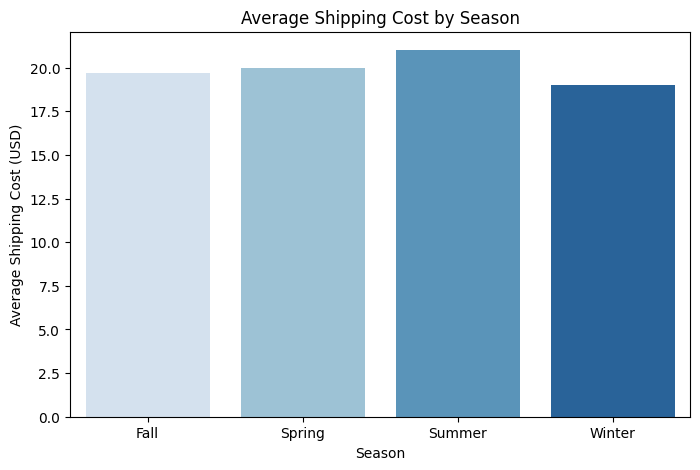

In [89]:
plt.figure(figsize=(8, 5))
sns.barplot(x=seasonal_shipping_cost.index, y=seasonal_shipping_cost.values, palette="Blues")
plt.title("Average Shipping Cost by Season")
plt.xlabel("Season")
plt.ylabel("Average Shipping Cost (USD)")
plt.show()

### Analyze the most sold product categories in each season

In [90]:
items0 = df.groupby("seasons")['product_category_name_english'].agg(lambda x: x.value_counts().idxmax())
items0

seasons
Fall      bed_bath_table
Spring    bed_bath_table
Summer    bed_bath_table
Winter    bed_bath_table
Name: product_category_name_english, dtype: object

### Analyze the least sold product categories in each season

In [91]:
items1 = df.groupby("seasons")['product_category_name_english'].agg(lambda x: x.value_counts().idxmin())
items1

seasons
Fall          security_and_services
Spring            cds_dvds_musicals
Summer    fashion_childrens_clothes
Winter            cds_dvds_musicals
Name: product_category_name_english, dtype: object

### Show every product sold in each season

In [92]:
df.groupby(['seasons', 'product_category_name_english']).size().unstack()

product_category_name_english,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,books_technical,cds_dvds_musicals,christmas_supplies,cine_photo,computers,computers_accessories,consoles_games,construction_tools_construction,construction_tools_lights,construction_tools_safety,cool_stuff,costruction_tools_garden,costruction_tools_tools,diapers_and_hygiene,drinks,dvds_blu_ray,electronics,fashio_female_clothing,fashion_bags_accessories,fashion_childrens_clothes,fashion_male_clothing,fashion_shoes,fashion_sport,fashion_underwear_beach,fixed_telephony,flowers,food,food_drink,furniture_bedroom,furniture_decor,furniture_living_room,furniture_mattress_and_upholstery,garden_tools,health_beauty,home_appliances,home_appliances_2,home_comfort_2,home_confort,home_construction,housewares,industry_commerce_and_business,kitchen_dining_laundry_garden_furniture,la_cuisine,luggage_accessories,market_place,music,musical_instruments,office_furniture,party_supplies,perfumery,pet_shop,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
seasons,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Fall,28.0,50.0,8.0,NaN,83.0,544.0,535.0,2207.0,67.0,7.0,21.0,4.0,38.0,3.0,87.0,1141.0,320.0,78.0,13.0,31.0,791.0,32.0,13.0,1.0,40.0,10.0,325.0,7.0,466.0,2.0,41.0,51.0,7.0,36.0,30.0,6.0,51.0,64.0,10.0,1633.0,71.0,3.0,1105.0,1418.0,42.0,31.0,9.0,105.0,68.0,961.0,17.0,55.0,2.0,180.0,54.0,1.0,89.0,313.0,7.0,744.0,260.0,1.0,26.0,95.0,1.0,1598.0,340.0,10.0,826.0,1146.0,1077.0
Spring,67.0,103.0,84.0,3.0,130.0,1346.0,942.0,3430.0,199.0,20.0,103.0,1.0,32.0,32.0,29.0,2439.0,255.0,290.0,100.0,71.0,1201.0,73.0,35.0,12.0,136.0,30.0,866.0,16.0,618.0,3.0,22.0,96.0,11.0,34.0,87.0,7.0,156.0,90.0,34.0,2739.0,142.0,10.0,1344.0,2871.0,311.0,72.0,7.0,150.0,242.0,2283.0,128.0,65.0,5.0,335.0,116.0,15.0,242.0,646.0,12.0,959.0,621.0,NaN,60.0,231.0,31.0,2632.0,632.0,29.0,1458.0,1095.0,1925.0
Summer,62.0,85.0,88.0,21.0,100.0,1455.0,1039.0,3785.0,163.0,20.0,95.0,8.0,31.0,32.0,62.0,2267.0,330.0,425.0,172.0,58.0,1076.0,81.0,30.0,13.0,83.0,22.0,672.0,15.0,588.0,3.0,58.0,87.0,10.0,33.0,80.0,4.0,230.0,77.0,56.0,2374.0,204.0,4.0,1081.0,3521.0,354.0,104.0,10.0,162.0,195.0,2804.0,56.0,105.0,8.0,375.0,75.0,18.0,211.0,434.0,22.0,1051.0,806.0,NaN,90.0,213.0,38.0,2548.0,745.0,18.0,1195.0,1099.0,1984.0
Winter,89.0,61.0,36.0,NaN,67.0,1002.0,625.0,2458.0,124.0,13.0,50.0,1.0,51.0,5.0,38.0,2164.0,245.0,153.0,26.0,29.0,877.0,56.0,27.0,11.0,120.0,7.0,954.0,10.0,472.0,NaN,22.0,41.0,3.0,38.0,72.0,16.0,82.0,57.0,22.0,1966.0,113.0,23.0,1015.0,2065.0,103.0,61.0,5.0,59.0,122.0,1213.0,67.0,66.0,1.0,262.0,87.0,6.0,154.0,378.0,4.0,778.0,325.0,1.0,25.0,149.0,6.0,2089.0,861.0,30.0,1166.0,870.0,1116.0


### Detect the greatest difference between the requested order and arrival, and customer city

In [93]:
result=df.groupby('customer_city')['Difference between request order and arrive'].mean().sort_values(ascending=False).head(20)
result

customer_city
cacimbinhas               311.000000
sao joao do itaperiu      215.000000
livramento                179.000000
novo brasil               148.000000
vargem alegre             141.000000
santo antonio de goias    140.000000
cacequi                   131.000000
dores de guanhaes         117.000000
santana do araguaia       110.000000
capinzal do norte         109.000000
rinopolis                 108.333333
lebon regis               107.000000
caibate                    99.666667
adhemar de barros          98.000000
monte gordo                97.000000
engenheiro beltrao         96.000000
santa cruz de goias        86.666667
arace                      86.500000
avai                       83.000000
marcelino vieira           78.000000
Name: Difference between request order and arrive, dtype: float64

In [94]:
result_df = pd.DataFrame(result, columns=['Difference between request order and arrive']).reset_index()

In [95]:
result_df

,customer_city,Difference between request order and arrive
0,cacimbinhas,311.000000
1,sao joao do itaperiu,215.000000
2,livramento,179.000000
3,novo brasil,148.000000
4,vargem alegre,141.000000
5,santo antonio de goias,140.000000
6,cacequi,131.000000
7,dores de guanhaes,117.000000
8,santana do araguaia,110.000000
9,capinzal do norte,109.000000


##### Detect the evaluation with customer cities

<Axes: xlabel='customer_city', ylabel='review_score'>

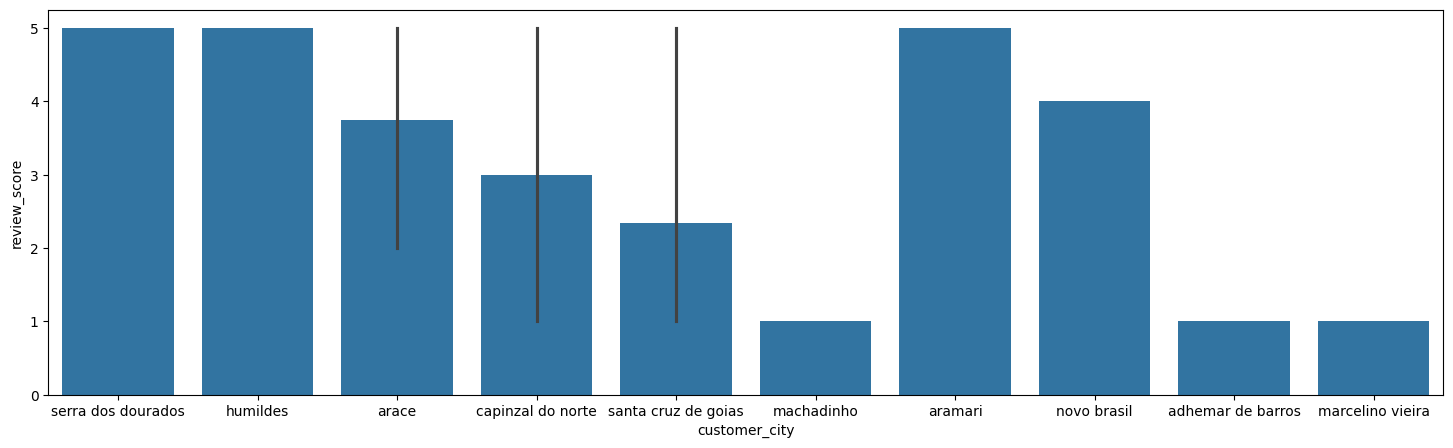

In [96]:
selected_cities = ["novo brasil",
    "capinzal do norte",
    "adhemar de barros",
    "santa cruz de goias",
    "arace",
    "marcelino vieira",
    "serra dos dourados",
    "aramari",
    "humildes",
    "machadinho"]
plt.figure(figsize=(18,5))
filtered_df=df[df['customer_city'].isin(selected_cities)]
sns.barplot(x='customer_city',y='review_score',data=filtered_df)

<Axes: xlabel='customer_city', ylabel='count'>

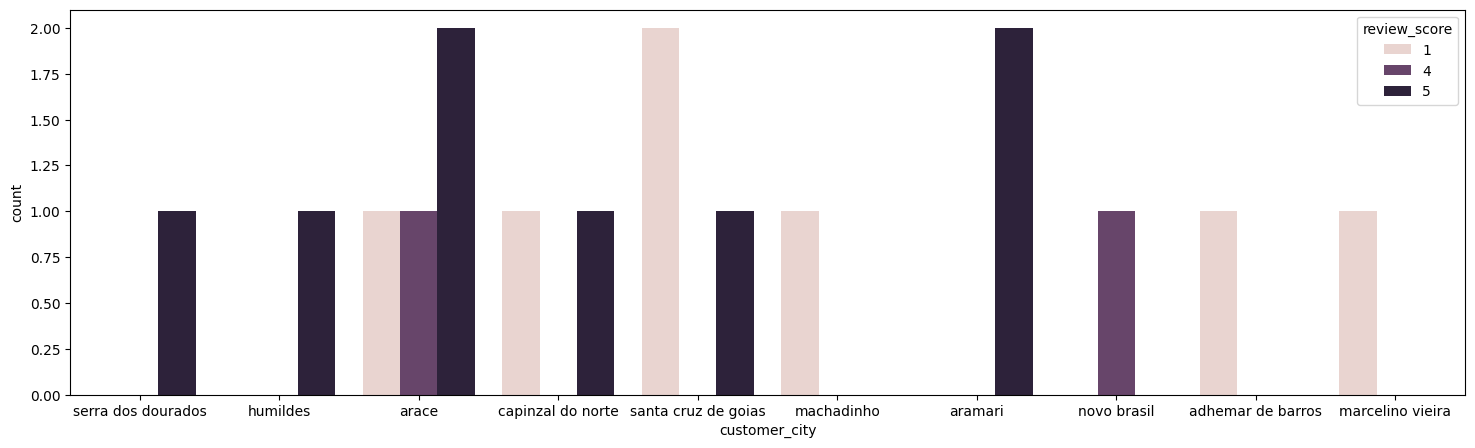

In [97]:
plt.figure(figsize=(18,5))
sns.countplot(x='customer_city',hue='review_score',data=filtered_df)

### Detect The Payment Method

<Axes: xlabel='payment_type', ylabel='Difference between request order and arrive'>

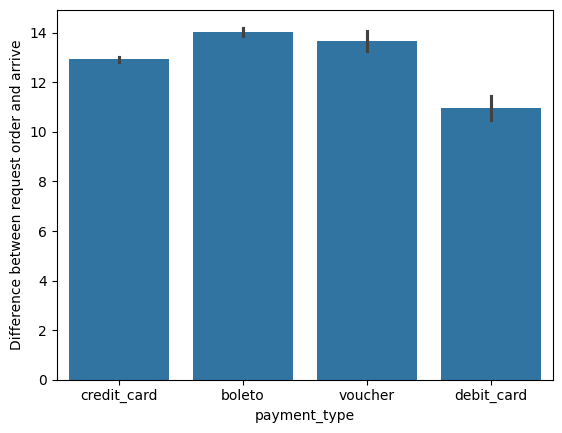

In [98]:
sns.barplot(x='payment_type', y='Difference between request order and arrive', data=df, estimator=np.mean)

In [99]:
df['payment_type'].value_counts()

payment_type
credit_card    84754
boleto         22350
voucher         6138
debit_card      1635
Name: count, dtype: int64

In [100]:
df.head(0)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,date of shipping_limit,day shipping_limit,month shipping_limit,year shipping_limit,day of review creation,month of review creation,year of review creation,date of review creation,day of answer for the review creation,month of answer for the review creation,year of answer for the review creation,date of answer for the review creation,day of order buy,month of order buy,year of order buy,date of order buy,day of approve for the order,month of approve for the order,year of approve for the order,date of approve for the order,day of deliver for the Shipping company,month of deliver for the Shipping company,year of deliver for the Shipping company,date of deliver for the Shipping company,day of deliver for customer,month of deliver for customer,year of deliver for customer,date of deliver for customer,day of expected to deliver for the customer,month of expected to deliver for the customer,year of expected to deliver for the customer,date of expected to deliver for the customer,Difference between request order and arrive,volume,days of answer for review,seasons


### Detect The Correlation between RS and Difference between request order and arrive

In [101]:
df['Difference between request order and arrive'].corr(df['review_score'])

np.float64(-0.2845031577929975)

### Show the correlation between all

In [102]:
df.select_dtypes(include=['int', 'float']).corr()

,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,customer_zip_code_prefix,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,day shipping_limit,month shipping_limit,year shipping_limit,day of review creation,month of review creation,year of review creation,day of answer for the review creation,month of answer for the review creation,year of answer for the review creation,day of order buy,month of order buy,year of order buy,day of approve for the order,month of approve for the order,year of approve for the order,day of deliver for the Shipping company,month of deliver for the Shipping company,year of deliver for the Shipping company,day of deliver for customer,month of deliver for customer,year of deliver for customer,day of expected to deliver for the customer,month of expected to deliver for the customer,year of expected to deliver for the customer,Difference between request order and arrive,volume,days of answer for review
order_item_id,1.000000,-0.060358,-0.030606,-0.002391,0.074613,0.267929,-0.136958,-0.000820,-0.023435,-0.014597,-0.054187,-0.003811,0.005747,0.030296,-0.009443,-0.019274,0.004942,0.005639,0.000813,-0.001773,0.008545,-0.001228,0.001532,0.010482,-0.002310,0.017370,-0.000331,0.002856,0.018173,0.000419,0.002625,0.005279,0.004205,0.002237,-0.004049,0.009088,-0.001752,-0.001015,0.010637,-0.001282,-0.009660,0.004009,0.001741
price,-0.060358,1.000000,0.415823,0.007236,0.278667,0.735658,-0.000975,0.041992,0.018615,0.202684,0.052967,0.340612,0.145041,0.224413,0.173170,0.089445,-0.009697,0.004301,-0.003942,-0.001254,0.002949,-0.001657,0.001734,0.003365,-0.002114,-0.010360,0.000067,-0.002536,-0.011965,0.000151,-0.002463,-0.012493,0.002306,-0.001484,-0.003547,0.004222,-0.000919,0.002088,0.005963,-0.002878,0.053397,0.300223,-0.001827
freight_value,-0.030606,0.415823,1.000000,0.020667,0.185468,0.371674,-0.036828,0.225602,0.023346,0.097189,0.021931,0.613163,0.306929,0.393070,0.323064,0.152640,-0.005726,0.008459,0.033275,0.005453,0.010997,0.040118,0.001260,0.011828,0.040067,-0.015919,0.004722,0.034098,-0.012369,0.004558,0.034152,-0.011223,0.007991,0.034500,0.000817,0.010849,0.042263,-0.004149,0.024324,0.037043,0.153211,0.586001,0.001588
payment_sequential,-0.002391,0.007236,0.020667,1.000000,-0.085837,-0.064005,-0.005296,-0.020808,-0.005536,0.010415,-0.011330,0.041462,0.048414,0.023187,0.030424,0.014960,-0.008216,0.004743,-0.046862,0.007226,0.005419,-0.046925,0.004289,0.007515,-0.047958,-0.011649,0.003704,-0.046104,-0.005958,0.003530,-0.046270,-0.007686,0.004102,-0.046555,0.007201,0.012050,-0.049096,0.029257,0.001821,-0.047213,0.032872,0.045192,0.000721
payment_installments,0.074613,0.278667,0.185468,-0.085837,1.000000,0.273280,-0.045035,0.057302,0.020784,0.035656,-0.000569,0.178301,0.116867,0.120950,0.137375,0.038044,-0.000439,0.032019,-0.052892,-0.005782,0.031916,-0.050173,0.000674,0.031256,-0.050245,0.003399,0.031356,-0.052451,0.001894,0.030285,-0.053003,-0.002197,0.030614,-0.051426,-0.007781,0.029692,-0.048225,0.000622,0.036815,-0.050820,0.037076,0.157545,-0.000684
payment_value,0.267929,0.735658,0.371674,-0.064005,0.273280,1.000000,-0.084672,0.052448,0.003138,0.157101,0.010237,0.304436,0.138206,0.217424,0.148191,0.069433,-0.009222,0.012105,0.001487,-0.004450,0.013838,0.002165,0.002278,0.014740,0.001317,-0.000748,0.004993,0.003554,-0.011013,0.006445,0.003519,-0.015350,0.011205,0.003982,-0.011111,0.014770,0.002990,0.002574,0.018535,0.000659,0.051093,0.272433,-0.001381
review_score,-0.136958,-0.000975,-0.036828,-0.005296,-0.045035,-0.084672,1.000000,-0.027124,-0.009557,0.011571,0.022436,-0.031075,-0.024448,-0.026324,-0.014370,0.023847,0.003462,0.028564,-0.000105,-0.010087,0.031086,-0.011379,-0.006409,0.033617,-0.012450,0.000627,0.031906,-0.000563,-0.001609,0.031700,-0.000435,0.004342,0.023748,-0.003924,0.004063,0.034056,-0.023861,0.008516,0.037595,-0.006921,-0.28

### Relationship between freight_value and price

<Axes: xlabel='freight_value', ylabel='price'>

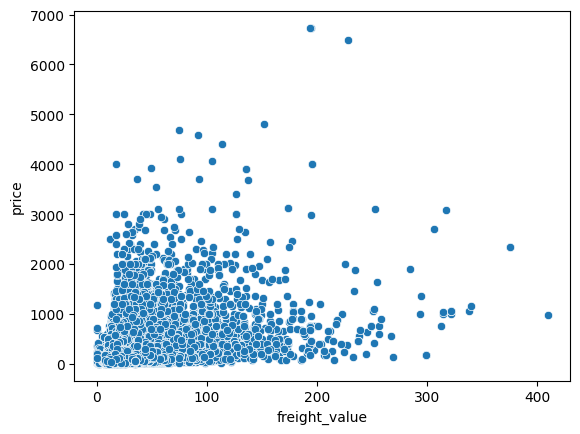

In [103]:
sns.scatterplot(x='freight_value',y='price',data=df)

### Relationship between volume and price

<Axes: xlabel='volume', ylabel='price'>

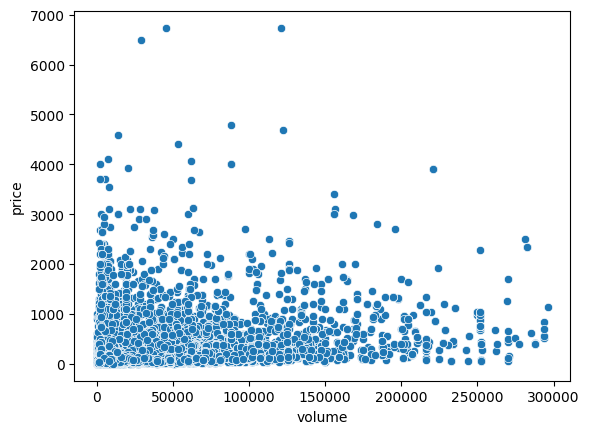

In [104]:
sns.scatterplot(x='volume',y='price',data=df)

### Relationship between product_description_lenght and price

<Axes: xlabel='product_description_lenght', ylabel='price'>

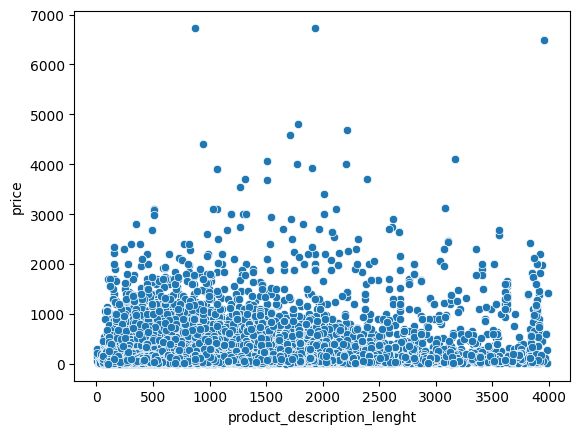

In [105]:
sns.scatterplot(x='product_description_lenght',y='price',data=df)

In [106]:
df.head(1)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,date of shipping_limit,day shipping_limit,month shipping_limit,year shipping_limit,day of review creation,month of review creation,year of review creation,date of review creation,day of answer for the review creation,month of answer for the review creation,year of answer for the review creation,date of answer for the review creation,day of order buy,month of order buy,year of order buy,date of order buy,day of approve for the order,month of approve for the order,year of approve for the order,date of approve for the order,day of deliver for the Shipping company,month of deliver for the Shipping company,year of deliver for the Shipping company,date of deliver for the Shipping company,day of deliver for customer,month of deliver for customer,year of deliver for customer,date of deliver for customer,day of expected to deliver for the customer,month of expected to deliver for the customer,year of expected to deliver for the customer,date of expected to deliver for the customer,Difference between request order and arrive,volume,days of answer for review,seasons
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,1,credit_card,2,72.19,97ca439bc427b48bc1cd7177abe71365,5,2017-09-21 00:00:00,2017-09-22 10:57:03,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,rj,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,sp,cool_stuff,2017-09-19,19,9,2017,21,9,2017,2017-09-21,22,9,2017,2017-09-22,13,9,2017,2017-09-13,13,9,2017,2017-09-13,19,9,2017,2017-09-19,20.0,9.0,2017.0,2017-09-20,29,9,2017,2017-09-29,7.0,3528.0,1.0,Fall


### Frequency of Installments per Payment Type

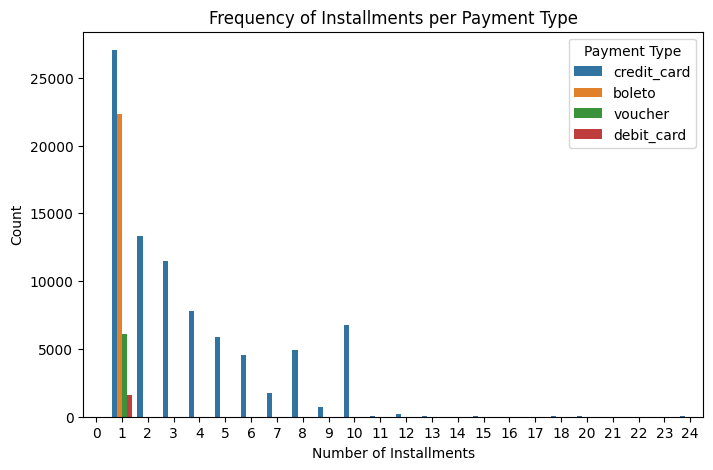

In [108]:
plt.figure(figsize=(8, 5))
sns.countplot(x='payment_installments', hue='payment_type', data=df)
plt.title('Frequency of Installments per Payment Type')
plt.xlabel('Number of Installments')
plt.ylabel('Count')
plt.legend(title='Payment Type')
plt.show()

### Distribution of Payment Installments

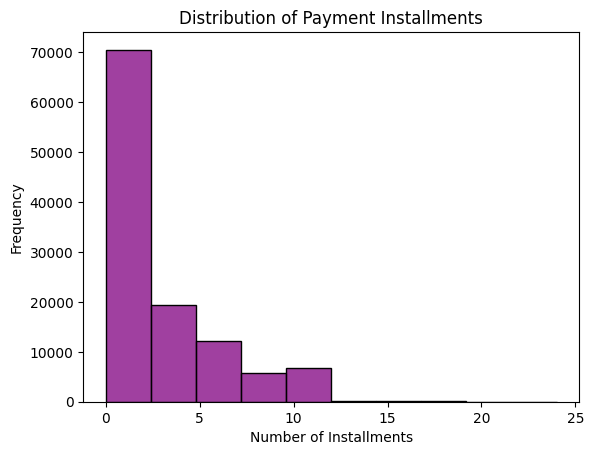

In [109]:
sns.histplot(df['payment_installments'], bins=10, color='purple')
plt.title('Distribution of Payment Installments')
plt.xlabel('Number of Installments')
plt.ylabel('Frequency')
plt.show()

### Comparison Between Late and On-Time Deliveries

C:\Users\test\AppData\Local\Temp\ipykernel_14380\2472588398.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=late_deliveries.index, y=late_deliveries.values, palette="Reds")


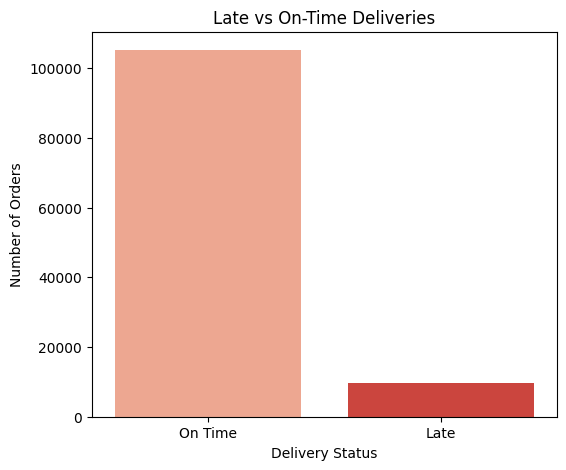

In [110]:
df['late_delivery'] = df['order_delivered_customer_date'] > df['order_estimated_delivery_date']
late_deliveries = df['late_delivery'].value_counts()
plt.figure(figsize=(6, 5))
sns.barplot(x=late_deliveries.index, y=late_deliveries.values, palette="Reds")
plt.xticks(ticks=[0, 1], labels=["On Time", "Late"])
plt.xlabel("Delivery Status")
plt.ylabel("Number of Orders")
plt.title("Late vs On-Time Deliveries")
plt.show()

### Review Creation vs Answer Month

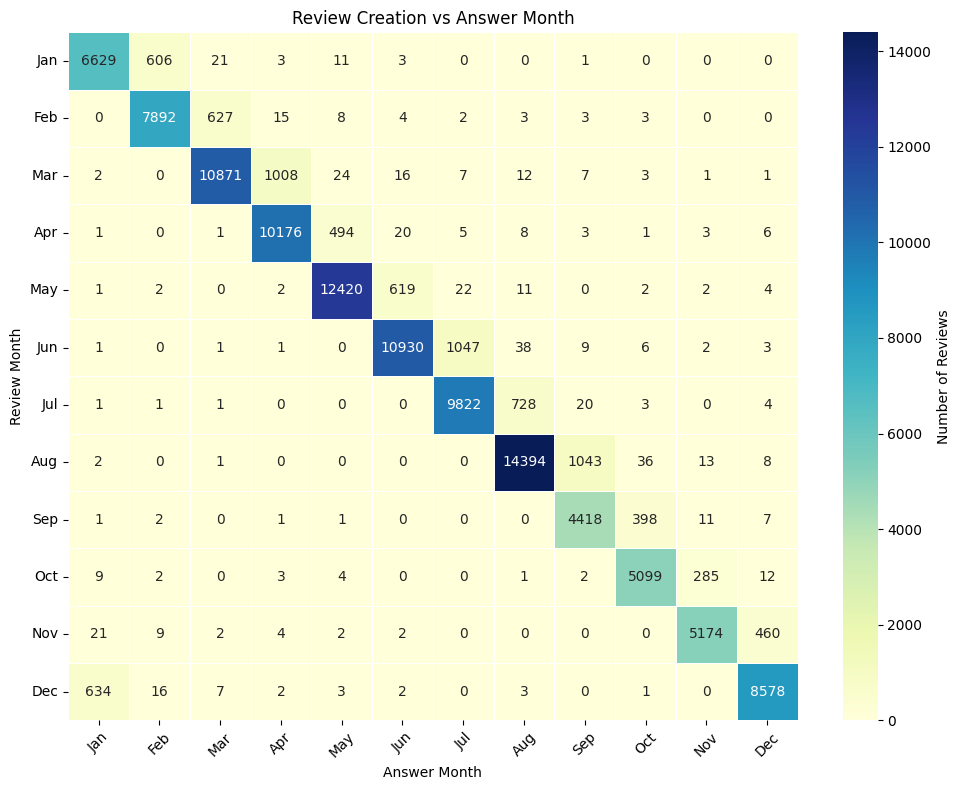

In [111]:
df['month of review creation'] = pd.to_numeric(df['month of review creation'], errors='coerce')
df['month of answer for the review creation'] = pd.to_numeric(df['month of answer for the review creation'], errors='coerce')
review_response_matrix = pd.crosstab(
    df['month of review creation'],
    df['month of answer for the review creation']
)
all_months = list(range(1, 13))
review_response_matrix = review_response_matrix.reindex(index=all_months, columns=all_months, fill_value=0)
plt.figure(figsize=(10, 8))
sns.heatmap(review_response_matrix,
            annot=True,
            fmt='d',
            cmap='YlGnBu',
            linewidths=0.5,
            cbar_kws={"label": "Number of Reviews"})

plt.title('Review Creation vs Answer Month')
plt.xlabel('Answer Month')
plt.ylabel('Review Month')
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=[i + 0.5 for i in range(12)], labels=month_names, rotation=45)
plt.yticks(ticks=[i + 0.5 for i in range(12)], labels=month_names, rotation=0)
plt.tight_layout()
plt.show()

In [112]:
df.head(1)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,date of shipping_limit,day shipping_limit,month shipping_limit,year shipping_limit,day of review creation,month of review creation,year of review creation,date of review creation,day of answer for the review creation,month of answer for the review creation,year of answer for the review creation,date of answer for the review creation,day of order buy,month of order buy,year of order buy,date of order buy,day of approve for the order,month of approve for the order,year of approve for the order,date of approve for the order,day of deliver for the Shipping company,month of deliver for the Shipping company,year of deliver for the Shipping company,date of deliver for the Shipping company,day of deliver for customer,month of deliver for customer,year of deliver for customer,date of deliver for customer,day of expected to deliver for the customer,month of expected to deliver for the customer,year of expected to deliver for the customer,date of expected to deliver for the customer,Difference between request order and arrive,volume,days of answer for review,seasons,late_delivery
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,1,credit_card,2,72.19,97ca439bc427b48bc1cd7177abe71365,5,2017-09-21 00:00:00,2017-09-22 10:57:03,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,rj,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,sp,cool_stuff,2017-09-19,19,9,2017,21,9,2017,2017-09-21,22,9,2017,2017-09-22,13,9,2017,2017-09-13,13,9,2017,2017-09-13,19,9,2017,2017-09-19,20.0,9.0,2017.0,2017-09-20,29,9,2017,2017-09-29,7.0,3528.0,1.0,Fall,False


## Deliverables: 
#### Cleaned Dataset and Analysis Report: A report documenting the data cleaning steps, challenges, 
#### and insights from the analysis. 
#### Advanced Visualizations: Interactive visualizations (e.g., time series trends, seasonal patterns) or 
#### dashboards to explore the data. 

# Milestone 3: Forecasting Model Development and Optimization 

### Extract features and target variable from the DataFrame

### Check the Outliers for Features

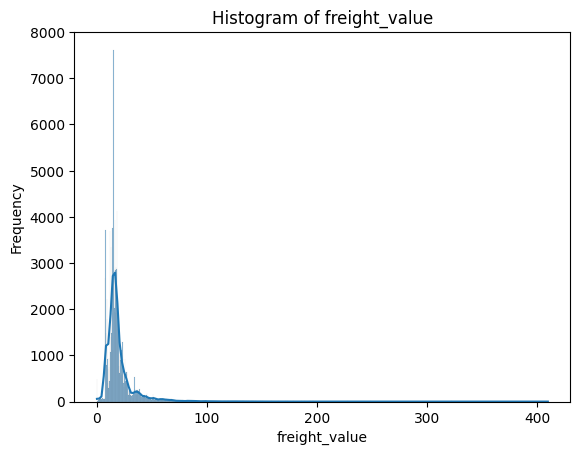

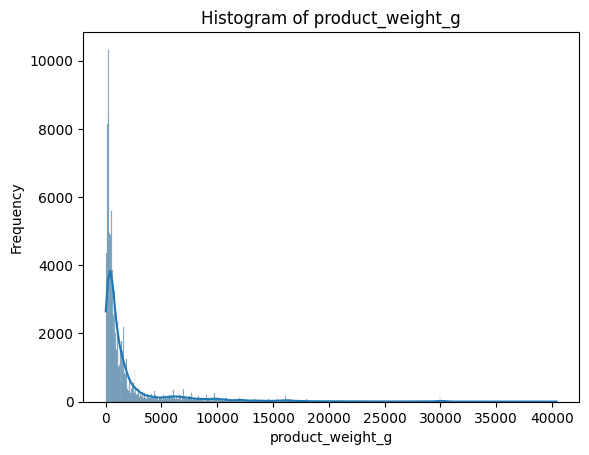

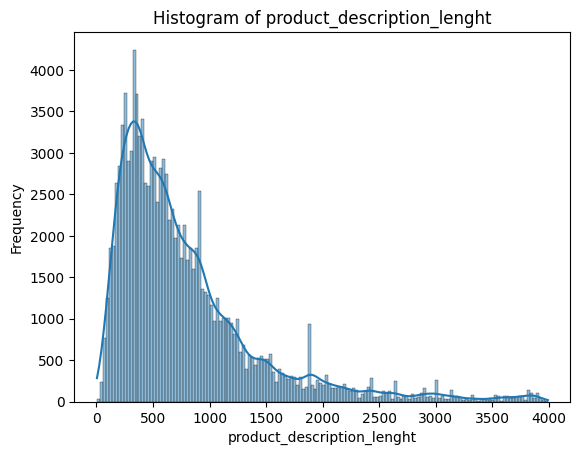

In [113]:
outlier= ['freight_value', 'product_weight_g','product_description_lenght'] 

for col in outlier:
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

### Handle the outliers

In [114]:
df=df.query("product_weight_g < 15000")
df=df.query("freight_value < 100")

In [115]:
numerical_cols = [
    "payment_sequential",
    "payment_installments",
    "product_name_lenght",
    "product_description_lenght",
    "product_photos_qty",
    "product_weight_g",
    "product_length_cm",
    "product_height_cm",
    "product_width_cm",
    "freight_value"
]

categorical_cols = [
    "order_status",
    "customer_city",
    "product_category_name_english",
    "seller_city",
]

x_num_df = df[numerical_cols].copy()

valid_rows = (x_num_df >= 0).all(axis=1)

df_valid = df[valid_rows].copy()
x_num_df_valid = x_num_df[valid_rows].copy()
x_num_df_log = np.log1p(x_num_df_valid)

x_catboost = pd.concat([x_num_df_log, df_valid[categorical_cols]], axis=1)


y=df['price']

<Axes: xlabel='price', ylabel='Count'>

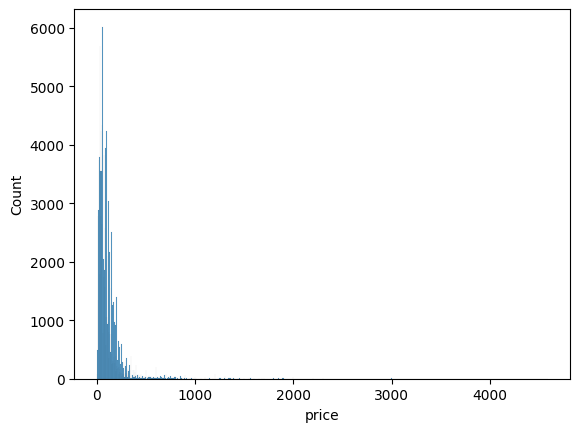

In [116]:
sns.histplot(df['price'])

### Apply Log Transformation to avoid the skewness

In [117]:
y_log = np.log(df['price']).values

### Split thd data

In [118]:
from sklearn.model_selection import train_test_split
xtrain_cat, xtest_cat, ytrain_cat, ytest_cat = train_test_split(x_catboost, y_log, random_state=0, test_size=0.2)
cat_features_indices = [x_catboost.columns.get_loc(col) for col in categorical_cols]

In [119]:
df.isnull().sum()

order_id                                       0
order_item_id                                  0
product_id                                     0
seller_id                                      0
shipping_limit_date                            0
                                              ..
Difference between request order and arrive    0
volume                                         0
days of answer for review                      0
seasons                                        0
late_delivery                                  0
Length: 75, dtype: int64

### Make RobustScaler

In [122]:
from sklearn.preprocessing import RobustScaler
xtrain_num = xtrain_cat[numerical_cols]
xtest_num = xtest_cat[numerical_cols]
xtrain_cat_part = xtrain_cat[categorical_cols]
xtest_cat_part = xtest_cat[categorical_cols]

scaler = RobustScaler()
xtrain_num_scaled = scaler.fit_transform(xtrain_num)
xtest_num_scaled = scaler.transform(xtest_num)

xtrain_num_scaled = pd.DataFrame(xtrain_num_scaled, columns=numerical_cols, index=xtrain_num.index)
xtest_num_scaled = pd.DataFrame(xtest_num_scaled, columns=numerical_cols, index=xtest_num.index)

xtrain_final = pd.concat([xtrain_num_scaled, xtrain_cat_part], axis=1)
xtest_final = pd.concat([xtest_num_scaled, xtest_cat_part], axis=1)

### Build The Model (CatBoost)

In [123]:
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score


cat_model = CatBoostRegressor(verbose=0)
cat_model.fit(xtrain_final, ytrain_cat, cat_features=cat_features_indices)
y_pred_cat = cat_model.predict(xtest_final)
r2_cat = r2_score(ytest_cat, y_pred_cat)
r2_cat = round(r2_cat, 2) * 100
print("CatBoost Test R² Score:", r2_cat, "%")

acc_cat = round(r2_score(ytrain_cat, cat_model.predict(xtrain_final)), 2) * 100
print("CatBoost Train R² Score:", acc_cat, "%")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

CatBoost Test R² Score: 78.0 %
CatBoost Train R² Score: 82.0 %


# Milestone 4: MLOps, Deployment, and Monitoring 


### Deploy the model using frameworks such as Flask or Streamlit to provide a user interface for 
### generating real-time sales forecasts. 

In [ ]:
# using streamlit

import pickle
pickle.dump(cat_model,open(r"C:\Users\test\DEPI Project\Project DEPI.pkl", "wb"))

In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, FunctionTransformer
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score
import pickle


numerical_cols = [
    "payment_sequential",
    "payment_installments",
    "product_name_lenght",
    "product_description_lenght",
    "product_photos_qty",
    "product_weight_g",
    "product_length_cm",
    "product_height_cm",
    "product_width_cm",
    "freight_value"
]

categorical_cols = [
    "order_status",
    "customer_city",
    "product_category_name_english",
    "seller_city"
]

valid_rows = (df[numerical_cols] >= 0).all(axis=1)
df = df[valid_rows]

X = df[numerical_cols + categorical_cols].copy()
y = np.log(df["price"].values) 


numerical_pipeline = Pipeline([
    ("log", FunctionTransformer(np.log1p, validate=True)),
    ("scaler", RobustScaler())
])

preprocessor = ColumnTransformer([
    ("num", numerical_pipeline, numerical_cols)
], remainder='passthrough')  


cat_model = CatBoostRegressor(verbose=0)

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", cat_model)
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

cat_idx = [X.columns.get_loc(col) for col in categorical_cols]

full_pipeline.named_steps["model"].set_params(cat_features=cat_idx)

full_pipeline.fit(X_train, y_train)

y_pred = full_pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R² Score:", round(r2 * 100, 2), "%")

with open(r"C:\Users\test\DEPI Project\Project DEPI.pkl", "wb") as f:
    pickle.dump(full_pipeline, f)
